# Project Outline: Crime Statistics
This is the collection, cleaning, and merging section for crime calls of the final capstone project "To Everything There is a Season : Using Weather Data and Demographic Information in the Predictive Modeling of Crimes in Dallas, Texas' by Ashley Steele. 

[1. Importing Libraries and Setting Preferences](#1.-Importing-Libraries-and-Setting-Preferences)


[2. Data Importing and Exploratory Data Analysis(EDA)](#2.-Data-Importing-and-Exploratory-Data-Analysis(EDA))
- [2.1: Importing Data and Creating Data Frame](#2.1:-Importing-Data-and-Creating-Data-Frame)
- [2.2: Data Cleaning](#2.2:-Data-Cleaning)
- [2.3: Dealing With Null Values](#2.3:-Dealing-With-Null-Values)
- [2.4: Working with Datetime Objects and Conversions](#2.4:-Working-with-Datetime-Objects-and-Conversions)


[3. All About Victim Ages!](#3.-All-About-Victim-Ages!)


[4. Deeper Variable Exploration](#4.-Deeper-Variable-Exploration)


[5. Creating a Aggregated Dataframe for Working](#5.-Creating-a-Aggregated-Dataframe-for-Working)


[6. Saving and Exporting for Use With Other Data](#6.-Saving-and-Exporting-for-Use-With-Other-Data)

## 1. Importing Libraries and Setting Preferences
[Return to Outline](#Project-Outline:-Crime-Statistics)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
# Importing preferences/ looks for stuff here
pd.set_option('display.max_columns', 999)
pd.options.display.max_rows = 4000

In [3]:
# What directory as we in currently?
os.getcwd()

'C:\\Users\\gothv\\Jupyter\\final_capstone'

## 2. Data Importing and Exploratory Data Analysis(EDA)
[Return to Outline](#Project-Outline:-Crime-Statistics)

### 2.1: Importing Data and Creating Data Frame
[Return to Outline](#Project-Outline:-Crime-Statistics)


In [4]:
# Creating our new data frame
df= pd.read_csv('Police_Incidents.csv', dtype = 'unicode')

In [5]:
# Sanity check: What does our df look like?
df.head()

,Incident Number w/year,Year of Incident,Service Number ID,Watch,Call (911) Problem,Type of Incident,Type Location,Type of Property,Incident Address,Apartment Number,Reporting Area,Beat,Division,Sector,Council District,Target Area Action Grids,Community,Date1 of Occurrence,Year1 of Occurrence,Month1 of Occurence,Day1 of the Week,Time1 of Occurrence,Day1 of the Year,Date2 of Occurrence,Year2 of Occurrence,Month2 of Occurence,Day2 of the Week,Time2 of Occurrence,Day2 of the Year,Date of Report,Date incident created,Offense Entered Year,Offense Entered Month,Offense Entered Day of the Week,Offense Entered Time,Offense Entered Date/Time,CFS Number,Call Received Date Time,Call Date Time,Call Cleared Date Time,Call Dispatch Date Time,Special Report (Pre-RMS),Person Involvement Type,Victim Type,Victim Name,Victim Race,Victim Ethnicity,Victim Gender,Victim Age,Victim Age at Offense,Victim Home Address,Victim Apartment,Victim Zip Code,Victim City,Victim State,Victim Business Name,Victim Business Address,Victim Business Phone,Responding Officer #1 Badge No,Responding Officer #1 Name,Responding Officer #2 Badge No,Responding Officer #2 Name,Reporting Officer Badge No,Assisting Officer Badge No,Reviewing Officer Badge No,Element Number Assigned,Investigating Unit 1,Investigating Unit 2,Offense Status,UCR Disposition,Victim Injury Description,Victim Condition,Modus Operandi (MO),Family Offense,Hate Crime,Hate Crime Description,Weapon Used,Gang Related Offense,Victim Package,Drug Related Istevencident,RMS Code,Criminal Justice Information Service Code,Penal Code,UCR Offense Name,UCR Offense Description,UCR Code,Offense Type,NIBRS Crime,NIBRS Crime Category,NIBRS Crime Against,NIBRS Code,NIBRS Group,NIBRS Type,Update Date,X Coordinate,Y Cordinate,Zip Code,City,State,Location1
0,159977-2018,2018,159977-2018-01,3,12R - RESIDENTIAL ALARM,ALARM INCIDENT REPORT (NO OFFENSE),NaN,NaN,9110 ROCKBROOK DR,NaN,3052,524,NORTHWEST,520,D13,NaN,NaN,07/21/2018,2018,July,Sat,19:45,202,07/21/2018,2018,July,Sat,19:57,202,07/21/2018 08:30:00 PM,07/21/2018 08:28:39 PM,2018,July,Sat,20:28,202,18-1322612,07/21/2018 07:57:21 PM,07/21/2018 07:57:19 PM,07/21/2018 08:36:34 PM,07/21/2018 08:16:35 PM,NaN,Victim,Society/Public,CITY OF DALLAS,NaN,NaN,NaN,NaN,NaN,9801 HARRY HINES BLVD,NaN,75220,DALLAS,TX,NaN,NaN,NaN,10768,"KERR,RV",10769,"HARMON,CHAD",10768,NaN,118185,C553,NaN,NaN,Suspended,Suspended,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA-99999999-MSC4,99999999,Alarm- No Offense,NaN,NaN,NaN,NaN,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,D,Not Coded,2018-07-26 05:42:40.0000000,2480409.34893,7001587.06409,75220,DALLAS,TX,"9110 ROCKBROOK DR\nDALLAS, TX 75220\n(32.86501..."
1,063412-2019,2019,063412-2019-01,2,6XA - MAJOR DIST AMBULANCE,ASSAULT -OFFENSIVE CONTACT,NaN,NaN,5631 SPRING VALLEY RD,175,1009,632,NORTH CENTRAL,630,D11,SpringValley Preston,NaN,03/31/2019,2019,March,Sun,08:45,90,03/31/2019,2019,March,Sun,08:47,90,03/31/2019 03:35:00 PM,03/31/2019 08:52:31 AM,2019,March,Sun,08:52,90,19-0560418,03/31/2019 08:31:43 AM,03/31/2019 08:31:42 AM,03/31/2019 09:31:19 AM,03/31/2019 08:33:37 AM,NaN,Victim,Individual,"SMITH, DERIC, SWAIN",White,Non-Hispanic or Latino,Male,37,36,5631 SPRING VALLEY RD,275,75254,DALLAS,TX,NaN,NaN,NaN,9442,"ALLISON,TROY,LEE",NaN,NaN,9442,9163,106845,B625,Investigations,Capers / Assaults,Suspended,Suspended,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MC-99999999-H29,99999999,PC 22.01(a)(3),NaN,NaN,NaN,NaN,SIMPLE ASSAULT,ASSAULT OFFENSES,PERSON,13B,A,Coded,2019-04-21 16:30:56.0000000,2486843.65365,7028765.38112,75254,DALLAS,TX,"5631 SPRING VALLEY RD\nDALLAS, TX 75254\n(32.9..."
2,012761-2019,2019,012761-2019-01,2,40/01 - OTHER,UNEXPLAINED DEATH (NO OFFENSE),NaN,NaN,3601 CARL ST,NaN,2117,311,SOUTHEAST,310,D7,NaN,NaN,01/19/2019,2019,January,Sat,08:00,19,01/19/2019,2019,January,Sat,12:49,19,01/19/2019 01:00:00 PM,01/19/2019 01:23:45 PM,2019,January,Sat,13:23,19,19-0112505,01/19/2019 12:48:56 PM,01/19/2019 12:48:56 PM,01/19/2019 03:38:30 PM,01/19/2019 12:53:

In [6]:
# What are the columns in the dataset?
df.columns

Index(['Incident Number w/year', 'Year of Incident', 'Service Number ID',
       'Watch', 'Call (911) Problem', 'Type of Incident', 'Type  Location',
       'Type of Property', 'Incident Address', 'Apartment Number',
       'Reporting Area', 'Beat', 'Division', 'Sector', 'Council District',
       'Target Area Action Grids', 'Community', 'Date1 of Occurrence',
       'Year1 of Occurrence', 'Month1 of Occurence', 'Day1 of the Week',
       'Time1 of Occurrence', 'Day1 of the Year', 'Date2 of Occurrence ',
       'Year2 of Occurrence', 'Month2 of Occurence', 'Day2 of the Week',
       'Time2 of Occurrence', 'Day2 of the Year', 'Date of Report',
       'Date incident created', 'Offense Entered Year',
       'Offense Entered Month', 'Offense Entered Day of the Week',
       'Offense Entered Time', 'Offense Entered  Date/Time', 'CFS Number',
       'Call Received Date Time', 'Call Date Time', 'Call Cleared Date Time',
       'Call Dispatch Date Time', 'Special Report (Pre-RMS)',
       'Per

In [7]:
# What do our data look like?
df.describe()

,Incident Number w/year,Year of Incident,Service Number ID,Watch,Call (911) Problem,Type of Incident,Type Location,Type of Property,Incident Address,Apartment Number,Reporting Area,Beat,Division,Sector,Council District,Target Area Action Grids,Community,Date1 of Occurrence,Year1 of Occurrence,Month1 of Occurence,Day1 of the Week,Time1 of Occurrence,Day1 of the Year,Date2 of Occurrence,Year2 of Occurrence,Month2 of Occurence,Day2 of the Week,Time2 of Occurrence,Day2 of the Year,Date of Report,Date incident created,Offense Entered Year,Offense Entered Month,Offense Entered Day of the Week,Offense Entered Time,Offense Entered Date/Time,CFS Number,Call Received Date Time,Call Date Time,Call Cleared Date Time,Call Dispatch Date Time,Special Report (Pre-RMS),Person Involvement Type,Victim Type,Victim Name,Victim Race,Victim Ethnicity,Victim Gender,Victim Age,Victim Age at Offense,Victim Home Address,Victim Apartment,Victim Zip Code,Victim City,Victim State,Victim Business Name,Victim Business Address,Victim Business Phone,Responding Officer #1 Badge No,Responding Officer #1 Name,Responding Officer #2 Badge No,Responding Officer #2 Name,Reporting Officer Badge No,Assisting Officer Badge No,Reviewing Officer Badge No,Element Number Assigned,Investigating Unit 1,Investigating Unit 2,Offense Status,UCR Disposition,Victim Injury Description,Victim Condition,Modus Operandi (MO),Family Offense,Hate Crime,Hate Crime Description,Weapon Used,Gang Related Offense,Victim Package,Drug Related Istevencident,RMS Code,Criminal Justice Information Service Code,Penal Code,UCR Offense Name,UCR Offense Description,UCR Code,Offense Type,NIBRS Crime,NIBRS Crime Category,NIBRS Crime Against,NIBRS Code,NIBRS Group,NIBRS Type,Update Date,X Coordinate,Y Cordinate,Zip Code,City,State,Location1
count,600107,600107,600107,600107,596298,600107,599300,141884,596610,121146,599478,599794,599794,599801,597672,200656,65240,600101,600101,600101,600101,600101,600101,600101,600101,600101,600101,600101,600101,600107,600107,600107,600107,600107,600107,600107,596299,596299,596299,595935,596242,3250,578676,570424,575171,362631,365752,362809,344126,337792,563143,155069,555812,562463,557637,24364,16277,8320,595297,594475,227051,227050,596745,432184,597906,595723,422020,422045,589248,589317,29983,22701,573774,597398,690,599245,390541,394658,0,597342,600107,600107,600107,409170,409170,409170,409170,341022,341022,341022,341022,341022,341022,600107,596316,596316,596335,594742,594452,596610
unique,553985,12,600107,3,126,972,77,25,154902,8728,1151,234,14,36,19,31,32,2378,31,12,7,1440,366,2184,20,12,7,1440,366,460061,516906,6,12,7,1440,366,527478,526627,526590,525985,526561,13,8,9,330528,9,3,5,117,98,227799,9433,7055,5510,77,10844,9068,6115,3947,3897,3918,3904,3970,2386,167,3970,4,54,8,12,20611,5,359204,1,2,24,36,5,0,6,1055,534,485,49,37,67,3,48,30,6,44,4,3,537044,203007,202877,126,82,26,159751
top,216100-2017,2018,066081-2015-01,1,58 - ROUTINE INVESTIGATION,BMV,"Highway, Street, Alley ETC",Motor Vehicle,1400 S LAMAR ST,100,1217,153,NORTHEAST,150,D2,WebbChapel Timberline,Northwest_PFA,08/03/2018,2018,July,Fri,00:00,213,07/13/2018,2018,July,Mon,08:00,194,09/21/2017 03:38:00 AM,09/21/2017 02:26:02 AM,2018,July,Mon,16:55,194,17-1798291,09/21/2017 02:25:13 AM,09/21/2017 02:25:13 AM,09/21/2017 08:47:02 PM,09/21/2017 02:25:14 AM,State Fair (Inside Fair),Victim,Individual,CITY OF DALLAS,Black,Non-Hispanic or Latino,Male,26,26,725 N JIM MILLER RD,101,75217,DALLAS,TX,SELF,9915 E NORTHWEST HWY,2146704415,94392,"WILLIS,LINDA,M",6700,"FRANCIS JR,GEORGE",94392,5799,81075,EX07,Investigations,Special Investigations / Auto Theft,Suspended,Suspended,DECEASED,Good,FOUND PROPERTY,false,No,None,Other,No,NaN,No,MA-22990004-F1,99999999,PC 30.04(a),THEFT/BMV,THEFT,1400,PART1,MISCELLANEOUS,MISCELLANEOUS,PROPERTY,999,A,Coded,2017-09-21 18:11:03.0000000,2497879.95441,6971387.76359,75217,DALLAS,TX,"1400 S LAMAR ST\nDALLAS, TX 75215\n(32.767362,..."
freq,139,133899,1,240837,71886,64468,114339,27790,2672,1401,5

In [8]:
# What datatypes are we dealing with?
df.dtypes

Incident Number w/year                       object
Year of Incident                             object
Service Number ID                            object
Watch                                        object
Call (911) Problem                           object
Type of Incident                             object
Type  Location                               object
Type of Property                             object
Incident Address                             object
Apartment Number                             object
Reporting Area                               object
Beat                                         object
Division                                     object
Sector                                       object
Council District                             object
Target Area Action Grids                     object
Community                                    object
Date1 of Occurrence                          object
Year1 of Occurrence                          object
Month1 of Oc

### 2.2: Data Cleaning
[Return to Outline](#Project-Outline:-Crime-Statistics)

In [9]:
# Making column names easier to manage/consistant
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

In [10]:
# Getting rid of columns we don't need right away!
df.drop(['incident_number_w/year', 'year_of_incident', 'service_number_id','watch', 'type__location','type_of_property',
         'apartment_number', 'reporting_area', 'beat','target_area_action_grids', 'community', 'date2_of_occurrence_', 
         'year2_of_occurrence', 'month2_of_occurence', 'day2_of_the_week','time2_of_occurrence', 'day2_of_the_year',
         'date_of_report','date_incident_created', 'offense_entered_year','offense_entered_month', 'offense_entered_day_of_the_week',
         'offense_entered_time', 'offense_entered__date/time', 'cfs_number','call_received_date_time', 'call_date_time',
         'call_cleared_date_time','call_dispatch_date_time', 'special_report_(pre-rms)','person_involvement_type', 
         'victim_name', 'victim_age_at_offense', 'victim_home_address', 'victim_apartment','victim_zip_code', 'victim_city',
         'victim_state', 'victim_business_name', 'victim_business_address', 'victim_business_phone', 'reporting_officer_badge_no',
         'assisting_officer_badge_no', 'reviewing_officer_badge_no','element_number_assigned', 'investigating_unit_1','investigating_unit_2',
         'offense_status', 'ucr_disposition','victim_injury_description', 'victim_condition', 'modus_operandi_(mo)','family_offense',
         'hate_crime', 'hate_crime_description', 'weapon_used','gang_related_offense', 'victim_package', 'drug_related_istevencident',
         'rms_code', 'criminal_justice_information_service_code', 'penal_code','ucr_offense_name', 'ucr_offense_description',
         '_ucr_code','offense_type', 'nibrs_crime', 'nibrs_crime_against', 'nibrs_code', 'nibrs_group', 'nibrs_type','update_date', 
         'city','state', 'location1'], axis = 1, inplace = True)

In [11]:
# Sanity check that our non-needed columns dropped
df.columns

Index(['call_(911)_problem', 'type_of_incident', 'incident_address',
       'division', 'sector', 'council_district', 'date1_of_occurrence',
       'year1_of_occurrence', 'month1_of_occurence', 'day1_of_the_week',
       'time1_of_occurrence', 'day1_of_the_year', 'victim_type', 'victim_race',
       'victim_ethnicity', 'victim_gender', 'victim_age',
       'responding_officer_#1__badge_no', 'responding_officer_#1__name',
       'responding_officer_#2_badge_no', 'responding_officer_#2__name',
       'nibrs_crime_category', 'x_coordinate', 'y_cordinate', 'zip_code'],
      dtype='object')

In [12]:
# Let's clean up the names of the remaining columns even further!
df.rename( columns = {'call_(911)_problem':'911_call_type','date1_of_occurrence':'date_of_occurrence', 
                      'year1_of_occurrence': 'year_of_occurrence', 'month1_of_occurence': 'month_of_occurrence',
                    'time1_of_occurrence': 'time_of_occurrence', 'day1_of_the_year': 'day_of_the_year' }, inplace= True)

In [13]:
# Sanity check for column renaming
df.columns

Index(['911_call_type', 'type_of_incident', 'incident_address', 'division',
       'sector', 'council_district', 'date_of_occurrence',
       'year_of_occurrence', 'month_of_occurrence', 'day1_of_the_week',
       'time_of_occurrence', 'day_of_the_year', 'victim_type', 'victim_race',
       'victim_ethnicity', 'victim_gender', 'victim_age',
       'responding_officer_#1__badge_no', 'responding_officer_#1__name',
       'responding_officer_#2_badge_no', 'responding_officer_#2__name',
       'nibrs_crime_category', 'x_coordinate', 'y_cordinate', 'zip_code'],
      dtype='object')

###  2.3: Dealing With Null Values 
[Return to Outline](#Project-Outline:-Crime-Statistics)

In [14]:
# Looking for nulls and such
df.isnull().sum().sort_values(ascending = False)

responding_officer_#2__name        373057
responding_officer_#2_badge_no     373056
nibrs_crime_category               259085
victim_age                         255981
victim_race                        237476
victim_gender                      237298
victim_ethnicity                   234355
victim_type                         29683
responding_officer_#1__name          5632
responding_officer_#1__badge_no      4810
911_call_type                        3809
x_coordinate                         3791
y_cordinate                          3791
zip_code                             3772
incident_address                     3497
council_district                     2435
division                              313
sector                                306
day_of_the_year                         6
time_of_occurrence                      6
day1_of_the_week                        6
month_of_occurrence                     6
year_of_occurrence                      6
date_of_occurrence                

Although we have a lot of null values there are only specific columns in which it is important to get rid of the nulls. We will take care of them below!

**Columns where null values are really important to get rid of:**

- Victim age
- victim race
- victim gender
- victim ethnicity
- victim type
- responding officer #1 name and badge
- X & Y coordinates
- Zipcode
- day of week, day of year, month - any time-based info!


In [15]:
# Specific rows are useless unless we get rid of the null values. 
df = df.dropna(subset= ['victim_age', 'victim_race', 'victim_gender', 'victim_ethnicity', 'victim_type', 'responding_officer_#1__name',
                   'responding_officer_#1__badge_no', '911_call_type', 'x_coordinate', 'y_cordinate', 'day_of_the_year', 
                   'time_of_occurrence', 'day1_of_the_week', 'month_of_occurrence', 'year_of_occurrence', 'date_of_occurrence'])

In [16]:
# Sanity check for removing specific nulls
df.isnull().sum().sort_values(ascending = False)

responding_officer_#2__name        225148
responding_officer_#2_badge_no     225148
nibrs_crime_category               163395
council_district                      414
division                               90
sector                                 90
zip_code                               70
time_of_occurrence                      0
type_of_incident                        0
incident_address                        0
date_of_occurrence                      0
year_of_occurrence                      0
month_of_occurrence                     0
day1_of_the_week                        0
victim_type                             0
day_of_the_year                         0
y_cordinate                             0
victim_race                             0
victim_ethnicity                        0
victim_gender                           0
victim_age                              0
responding_officer_#1__badge_no         0
responding_officer_#1__name             0
x_coordinate                      

In [17]:
# What do we have left for volume of info after dropping nulls?
df.describe()

,911_call_type,type_of_incident,incident_address,division,sector,council_district,date_of_occurrence,year_of_occurrence,month_of_occurrence,day1_of_the_week,time_of_occurrence,day_of_the_year,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,nibrs_crime_category,x_coordinate,y_cordinate,zip_code
count,339633,339633,339633,339543,339543,339219,339633,339633,339633,339633,339633,339633,339633,339633,339633,339633,339633,339633,339633,114485,114485,176238,339633,339633,339563
unique,119,641,115444,14,35,19,2234,28,12,7,1440,366,7,9,3,4,115,3657,3652,3473,3466,28,144608,144531,107
top,11V - BURG MOTOR VEH,BMV,1400 S LAMAR ST,NORTHEAST,220,D2,01/01/2016,2016,July,Fri,00:00,1,Individual,Black,Non-Hispanic or Latino,Male,26,94392,"WILLIS,LINDA,M",6700,"FRANCIS JR,GEORGE",LARCENY/ THEFT OFFENSES,2492641.4685,6966516.7986,75217
freq,53843,57509,1375,60072,13041,36346,294,65932,34029,51467,12827,1358,339255,116695,231332,183717,10820,6462,6462,419,419,54130,757,757,20130


### 2.4: Working with Datetime Objects and Conversions
[Return to Outline](#Project-Outline:-Crime-Statistics)

In [18]:
from datetime import datetime
from dateutil.parser import parse

In [19]:
# Since date of occurrence is our neatest date object let's take a closer look 
df['date_of_occurrence'].head()

1    03/31/2019
2    01/19/2019
3    01/26/2019
4    03/13/2019
7    01/10/2018
Name: date_of_occurrence, dtype: object

In [20]:
# Converting date of occurrence to a datetime type
df['date_of_occurrence'] = pd.to_datetime(df['date_of_occurrence'], errors = 'coerce')

In [21]:
# Sanity check: did our conversion work?
df['date_of_occurrence'].head()

1   2019-03-31
2   2019-01-19
3   2019-01-26
4   2019-03-13
7   2018-01-10
Name: date_of_occurrence, dtype: datetime64[ns]

In [22]:
# Making a copy of the date of occurrence column to use as our index
df['date_index'] = df['date_of_occurrence'].copy()

In [23]:
# Setting our index to our new date column
df.set_index('date_index', inplace = True)

In [24]:
# Sanity check that our index is now a date!
df.head()

,911_call_type,type_of_incident,incident_address,division,sector,council_district,date_of_occurrence,year_of_occurrence,month_of_occurrence,day1_of_the_week,time_of_occurrence,day_of_the_year,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,nibrs_crime_category,x_coordinate,y_cordinate,zip_code
date_index,,,,,,,,,,,,,,,,,,,,,,,,,
2019-03-31,6XA - MAJOR DIST AMBULANCE,ASSAULT -OFFENSIVE CONTACT,5631 SPRING VALLEY RD,NORTH CENTRAL,630,D11,2019-03-31,2019,March,Sun,08:45,90,Individual,White,Non-Hispanic or Latino,Male,37,9442,"ALLISON,TROY,LEE",NaN,NaN,ASSAULT OFFENSES,2486843.65365,7028765.38112,75254
2019-01-19,40/01 - OTHER,UNEXPLAINED DEATH (NO OFFENSE),3601 CARL ST,SOUTHEAST,310,D7,2019-01-19,2019,January,Sat,08:00,19,Individual,Black,Non-Hispanic or Latino,Male,77,8586,"KASCHALK,ERIN,MARIE",9792,"SWEET,MANDY,RAE",MISCELLANEOUS,2504557.88003,6968313.2658,75210
2019-01-26,40 - OTHER,ASSAULT -VERBAL THREAT,4309 MYRTLE ST,SOUTHEAST,340,D7,2019-01-26,2019,January,Sat,18:00,26,Individual,Black,Non-Hispanic or Latino,Female,54,9362,"BLAKE,ADRIENNE,JHANE",NaN,NaN,ASSAULT OFFENSES,2504153.81504,6962820.59258,75215
2019-03-13,20 - ROBBERY,ROBBERY OF INDIVIDUAL,205 S LAMAR ST,CENTRAL,130,D14,2019-03-13,2019,March,Wed,12:30,72,Individual,White,Non-Hispanic or Latino,Male,70,11011,"NALLEY,LOUIS,THEODORE",NaN,NaN,ROBBERY,2489673.42817,6970467.46261,75202
2018-01-10,**PD REQUESTED BY FIRE,UNEXPLAINED DEATH (NO OFFENSE),2516 SILVERTHORNE DR,NORTH CENTRAL,610,D12,2018-01-10,2018,January,Wed,07:00,10,Individual,White,Non-Hispanic or Latino,Female,29,9248,"CARR,JASON,MICHAEL",NaN,NaN,MISCELLANEOUS,2468448.28624,7048635.00477,75287


In [25]:
# Cleaning up base data and organizing by date of occurrence
df.sort_values(by=['date_of_occurrence'], inplace= True)
df.head(10)

,911_call_type,type_of_incident,incident_address,division,sector,council_district,date_of_occurrence,year_of_occurrence,month_of_occurrence,day1_of_the_week,time_of_occurrence,day_of_the_year,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,nibrs_crime_category,x_coordinate,y_cordinate,zip_code
date_index,,,,,,,,,,,,,,,,,,,,,,,,,
1980-06-01,58 - ROUTINE INVESTIGATION,THEFT - PRELIMINARY INVESTIGATION,5420 BENT TREE DR,NORTH CENTRAL,620,D11,1980-06-01,1980,June,Sun,08:00,153,Individual,White,Non-Hispanic or Latino,Female,70,4697,"ELWONGER,RICHARD,S",NaN,NaN,MISCELLANEOUS,2485116.60241,7043508.28321,75248
1989-01-27,24 - ABANDONED PROPERTY,FOUND PROPERTY (NO OFFENSE),8709 COMER DR,SOUTHEAST,330,D5,1989-01-27,1989,January,Fri,11:00,27,Individual,White,Non-Hispanic or Latino,Male,67,6689,"HERBERT,REGINA,L",NaN,NaN,NaN,2531273.18914,6956018.49085,75217
1989-03-29,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...,3459 PEBBLESHORES DR,SOUTH CENTRAL,750,D8,1989-03-29,1989,March,Wed,00:00,88,Individual,Black,Non-Hispanic or Latino,Female,51,8522,"BOWEN,JUSTIN,BOYD",NaN,NaN,MISCELLANEOUS,2502903.88154,6928429.7862,75241
1992-01-30,WIC - WALK IN CASE #,LOST PROPERTY (NO OFFENSE),1400 S LAMAR ST,CENTRAL,150,D2,1992-01-30,1992,January,Thu,07:00,30,Individual,Black,Non-Hispanic or Latino,Male,56,6798,"RUFF,ALBERT,W",NaN,NaN,MISCELLANEOUS,2492641.4685,6966516.7986,75215
1992-08-01,58 - ROUTINE INVESTIGATION,ASSAULT -OFFENSIVE CONTACT,7310 S WESTMORELAND RD,SOUTHWEST,450,D8,1992-08-01,1992,August,Sat,09:24,214,Individual,Black,Non-Hispanic or Latino,Female,50,7788,"ANDERSON,CHRISTOPHER,CLINTON",NaN,NaN,ASSAULT OFFENSES,2466163.8311,6926329.65189,75237
1996-10-01,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...,2240 MARBURG ST,SOUTHEAST,340,D7,1996-10-01,1996,October,Tue,08:00,275,Individual,Black,Non-Hispanic or Latino,Female,51,7375,"LUJAN,EDMUNDO,ALEJANDRO",NaN,NaN,MISCELLANEOUS,2503077.60137,6960877.08072,75215
1997-01-01,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO # ITEMS < 5,3815 DAWES DR,SOUTHWEST,430,D1,1997-01-01,1997,January,Wed,12:00,1,Individual,Hispanic or Latino,Hispanic or Latino,Female,53,6308,"STEPHENS,RUSSELL,M",NaN,NaN,FRAUD OFFENSES,2465798.74791,6951496.9392,75211
1998-01-01,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...,3328 LOGANWOOD DR,SOUTHEAST,320,D5,1998-01-01,1998,January,Thu,08:00,1,Individual,Hispanic or Latino,Hispanic or Latino,Male,51,7375,"LUJAN,EDMUNDO,ALEJANDRO",NaN,NaN,MISCELLANEOUS,2524321.57344,6966717.71129,75227
1999-03-22,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO # ITEMS < 5,1400 S LAMAR ST,CENTRAL,150,D2,1999-03-22,1999,March,Mon,00:00,81,Individual,Hispanic or Latino,Hispanic or Latino,Female,20,6992,"SANTIESTEBAN,RICHARD",NaN,NaN,NaN,2492641.4685,6966516.7986,75215


In [26]:
# Let's make a year and date column!
df['year']= df['date_of_occurrence'].dt.year
df['date'] = df['date_of_occurrence'].dt.date

In [27]:
# Now that I finally have my data in a datetime format we need to get rid of extra crap
df['year'].max()

2019

In [28]:
# What does our data that happened before 2000 look like?
df.loc[df['year']<2000]

,911_call_type,type_of_incident,incident_address,division,sector,council_district,date_of_occurrence,year_of_occurrence,month_of_occurrence,day1_of_the_week,time_of_occurrence,day_of_the_year,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,nibrs_crime_category,x_coordinate,y_cordinate,zip_code,year,date
date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980-06-01,58 - ROUTINE INVESTIGATION,THEFT - PRELIMINARY INVESTIGATION,5420 BENT TREE DR,NORTH CENTRAL,620,D11,1980-06-01,1980,June,Sun,08:00,153,Individual,White,Non-Hispanic or Latino,Female,70,4697,"ELWONGER,RICHARD,S",NaN,NaN,MISCELLANEOUS,2485116.60241,7043508.28321,75248,1980,1980-06-01
1989-01-27,24 - ABANDONED PROPERTY,FOUND PROPERTY (NO OFFENSE),8709 COMER DR,SOUTHEAST,330,D5,1989-01-27,1989,January,Fri,11:00,27,Individual,White,Non-Hispanic or Latino,Male,67,6689,"HERBERT,REGINA,L",NaN,NaN,NaN,2531273.18914,6956018.49085,75217,1989,1989-01-27
1989-03-29,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...,3459 PEBBLESHORES DR,SOUTH CENTRAL,750,D8,1989-03-29,1989,March,Wed,00:00,88,Individual,Black,Non-Hispanic or Latino,Female,51,8522,"BOWEN,JUSTIN,BOYD",NaN,NaN,MISCELLANEOUS,2502903.88154,6928429.7862,75241,1989,1989-03-29
1992-01-30,WIC - WALK IN CASE #,LOST PROPERTY (NO OFFENSE),1400 S LAMAR ST,CENTRAL,150,D2,1992-01-30,1992,January,Thu,07:00,30,Individual,Black,Non-Hispanic or Latino,Male,56,6798,"RUFF,ALBERT,W",NaN,NaN,MISCELLANEOUS,2492641.4685,6966516.7986,75215,1992,1992-01-30
1992-08-01,58 - ROUTINE INVESTIGATION,ASSAULT -OFFENSIVE CONTACT,7310 S WESTMORELAND RD,SOUTHWEST,450,D8,1992-08-01,1992,August,Sat,09:24,214,Individual,Black,Non-Hispanic or Latino,Female,50,7788,"ANDERSON,CHRISTOPHER,CLINTON",NaN,NaN,ASSAULT OFFENSES,2466163.8311,6926329.65189,75237,1992,1992-08-01
1996-10-01,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...,2240 MARBURG ST,SOUTHEAST,340,D7,1996-10-01,1996,October,Tue,08:00,275,Individual,Black,Non-Hispanic or Latino,Female,51,7375,"LUJAN,EDMUNDO,ALEJANDRO",NaN,NaN,MISCELLANEOUS,2503077.60137,6960877.08072,75215,1996,1996-10-01
1997-01-01,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO # ITEMS < 5,3815 DAWES DR,SOUTHWEST,430,D1,1997-01-01,1997,January,Wed,12:00,1,Individual,Hispanic or Latino,Hispanic or Latino,Female,53,6308,"STEPHENS,RUSSELL,M",NaN,NaN,FRAUD OFFENSES,2465798.74791,6951496.9392,75211,1997,1997-01-01
1998-01-01,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...,3328 LOGANWOOD DR,SOUTHEAST,320,D5,1998-01-01,1998,January,Thu,08:00,1,Individual,Hispanic or Latino,Hispanic or Latino,Male,51,7375,"LUJAN,EDMUNDO,ALEJANDRO",NaN,NaN,MISCELLANEOUS,2524321.57344,6966717.71129,75227,1998,1998-01-01
1999-03-22,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO # ITEMS < 5,1400 S LAMAR ST,CENTRAL,150,D2,1999-03-22,1999,March,Mon,00:00,81,Individual,Hispanic or Latino,Hispanic or Latino,Female,20,6992,"SANTIESTEBAN,RICHARD",NaN,NaN,NaN,2492641.4685,6966516.7986,75215,1999,1999-03-22


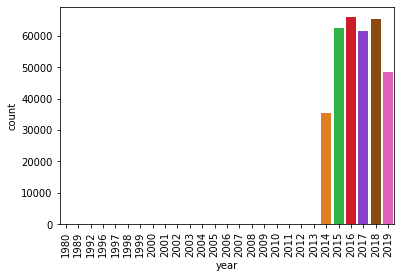

In [29]:
# Since we are already making things pretty- let's do a count plot for year
sns.countplot(df['year'], palette= 'bright')
plt.xticks(rotation = 90);

In [30]:
# Since the majority of our years are between 2015-2019, what do the years below that look like?
off_years = df.loc[df['year']< 2015]

In [31]:
# What does the distribution of these years look like?
off_years['year'].value_counts().head()

2014    35351
2013      126
2012       43
2011       27
2010       19
Name: year, dtype: int64

Interesting! We see that we have the most information on crimes that occurred between 2014 - 2019. This will be important later when selecting what final information to keep for our analysis and modeling!

In [32]:
# Creating a month and year column that is not a period
df['mnth_yr'] = df['date_of_occurrence'].apply(lambda x: x.strftime('%B-%Y')) 

In [33]:
#Sanity check: did our month/year work?
df.head()

,911_call_type,type_of_incident,incident_address,division,sector,council_district,date_of_occurrence,year_of_occurrence,month_of_occurrence,day1_of_the_week,time_of_occurrence,day_of_the_year,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,nibrs_crime_category,x_coordinate,y_cordinate,zip_code,year,date,mnth_yr
date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980-06-01,58 - ROUTINE INVESTIGATION,THEFT - PRELIMINARY INVESTIGATION,5420 BENT TREE DR,NORTH CENTRAL,620,D11,1980-06-01,1980,June,Sun,08:00,153,Individual,White,Non-Hispanic or Latino,Female,70,4697,"ELWONGER,RICHARD,S",NaN,NaN,MISCELLANEOUS,2485116.60241,7043508.28321,75248,1980,1980-06-01,June-1980
1989-01-27,24 - ABANDONED PROPERTY,FOUND PROPERTY (NO OFFENSE),8709 COMER DR,SOUTHEAST,330,D5,1989-01-27,1989,January,Fri,11:00,27,Individual,White,Non-Hispanic or Latino,Male,67,6689,"HERBERT,REGINA,L",NaN,NaN,NaN,2531273.18914,6956018.49085,75217,1989,1989-01-27,January-1989
1989-03-29,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...,3459 PEBBLESHORES DR,SOUTH CENTRAL,750,D8,1989-03-29,1989,March,Wed,00:00,88,Individual,Black,Non-Hispanic or Latino,Female,51,8522,"BOWEN,JUSTIN,BOYD",NaN,NaN,MISCELLANEOUS,2502903.88154,6928429.7862,75241,1989,1989-03-29,March-1989
1992-01-30,WIC - WALK IN CASE #,LOST PROPERTY (NO OFFENSE),1400 S LAMAR ST,CENTRAL,150,D2,1992-01-30,1992,January,Thu,07:00,30,Individual,Black,Non-Hispanic or Latino,Male,56,6798,"RUFF,ALBERT,W",NaN,NaN,MISCELLANEOUS,2492641.4685,6966516.7986,75215,1992,1992-01-30,January-1992
1992-08-01,58 - ROUTINE INVESTIGATION,ASSAULT -OFFENSIVE CONTACT,7310 S WESTMORELAND RD,SOUTHWEST,450,D8,1992-08-01,1992,August,Sat,09:24,214,Individual,Black,Non-Hispanic or Latino,Female,50,7788,"ANDERSON,CHRISTOPHER,CLINTON",NaN,NaN,ASSAULT OFFENSES,2466163.8311,6926329.65189,75237,1992,1992-08-01,August-1992


In [34]:
# It looks like there are several features involving time that they give us already!
# Let's look at month of occurrence first
df['month_of_occurrence'].describe()

count     339633
unique        12
top         July
freq       34029
Name: month_of_occurrence, dtype: object

Cool! We see that there are 12 unique months, good, and that the feature is currently a string. Let's make a new column that is a datetime type so we can have month as a datetime variable.

In [35]:
# Let's make a month column for our data
df['month']= df['date_of_occurrence'].dt.month
df['month'].head()

date_index
1980-06-01    6
1989-01-27    1
1989-03-29    3
1992-01-30    1
1992-08-01    8
Name: month, dtype: int64

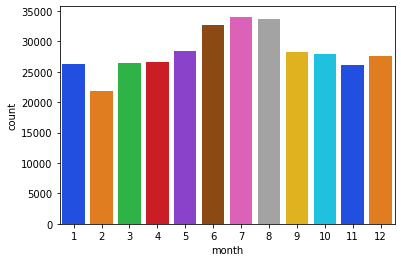

In [36]:
# What does distribution of months look like?
sns.countplot(df['month'], palette= 'bright');

Interesting! Our months with the most frequent number of crimes are July, August, and June. These months, followed by September, are typically the hotest months! We will add the actual temperatures per day later in this project to see if recorded temperatures agree with this!

Since we've created a column that is month and year, let's take a quick peek at what the distribution of those look like!

In [37]:
# Creating a sub-data frame of just counts of crimes per month/year combination
my_count= pd.DataFrame(df['mnth_yr'].value_counts())

In [38]:
my_count.head()

,mnth_yr
July-2018,6303
May-2019,6212
August-2018,6210
March-2019,6202
December-2018,6158


In [39]:
# Resetting index of df
my_count.reset_index(inplace = True)

In [40]:
# Re-naming columns for clarity
my_count  = my_count.rename(columns= {'index':'month_and_year', 'mnth_yr':'count'})

In [41]:
my_count.head()

,month_and_year,count
0,July-2018,6303
1,May-2019,6212
2,August-2018,6210
3,March-2019,6202
4,December-2018,6158


In [42]:
#Splitting month and year into two seperate chunks
new = my_count['month_and_year'].str.split("-", n = 1, expand = True) 

In [43]:
# Creating new columns for seperated values
my_count['month']= new[0]
my_count['year']= new[1]

In [44]:
# Sanity check that this worked!
my_count.head()

,month_and_year,count,month,year
0,July-2018,6303,July,2018
1,May-2019,6212,May,2019
2,August-2018,6210,August,2018
3,March-2019,6202,March,2019
4,December-2018,6158,December,2018


In [45]:
# Sorting this subdf into chronological order
my_count.sort_values(by= ['year'], inplace = True)

In [46]:
# Making a subset for months and years with more than 1,000 crimes reported
keep_months = my_count.loc[my_count['count']>1000]
keep_months

,month_and_year,count,month,year
58,June-2014,4676,June,2014
39,July-2014,5222,July,2014
38,December-2014,5230,December,2014
55,August-2014,4819,August,2014
33,October-2014,5333,October,2014
60,September-2014,4639,September,2014
46,November-2014,5027,November,2014
26,June-2015,5516,June,2015
12,October-2015,5734,October,2015
27,August-2015,5483,August,2015


In [47]:
# Great info, but sort of hard to look at in non-chronological order! Let's fix that!
keep_months.sort_values(['year', 'month'], ascending = [True, False])
keep_months.head()

,month_and_year,count,month,year
58,June-2014,4676,June,2014
39,July-2014,5222,July,2014
38,December-2014,5230,December,2014
55,August-2014,4819,August,2014
33,October-2014,5333,October,2014


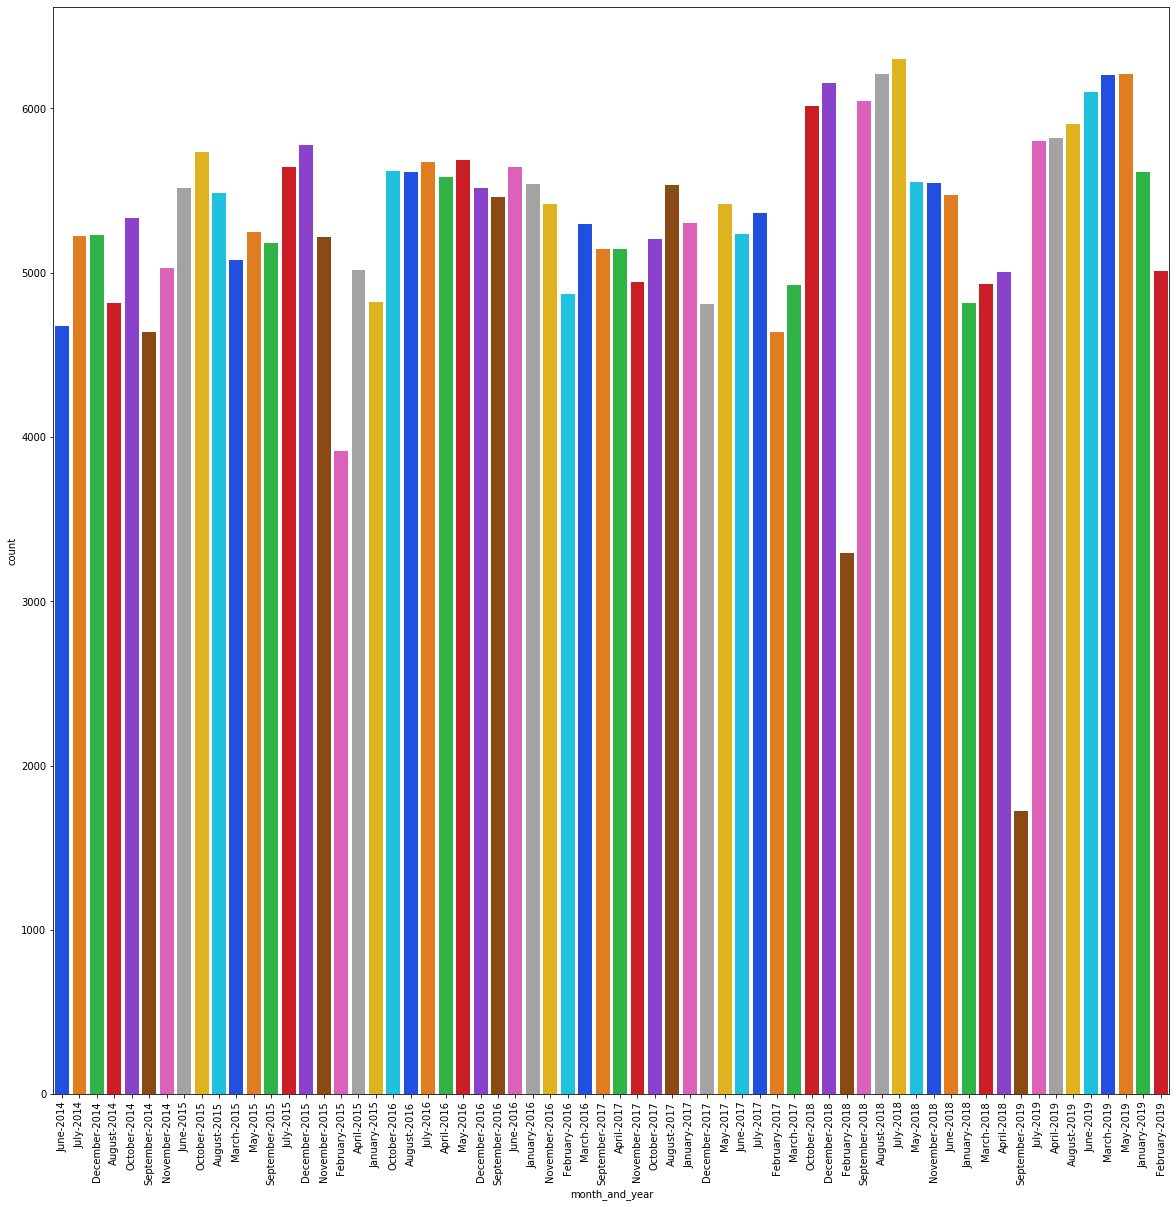

In [48]:
# Creating a  plot to look at the spread of crimes in specific month/year combinations
plt.figure(figsize =(20,20))
sns.barplot(x = keep_months['month_and_year'], y= keep_months['count'], data= keep_months, palette= 'bright')
plt.xticks(rotation = 90);

Now that we have a better understanding of the time frames/time related data for this dataset let's move on to other variables, like victim ages!

## 3. All About Victim Ages!
[Return to Outline](#Project-Outline:-Crime-Statistics)


In [49]:
# Taking a quick look at the victim age variable
df['victim_age'].describe()

count     339633
unique       115
top           26
freq       10820
Name: victim_age, dtype: object

In [50]:
# Converting the age into an interger to make it easier to deal with!
df['victim_age'] = df['victim_age'].astype(int)

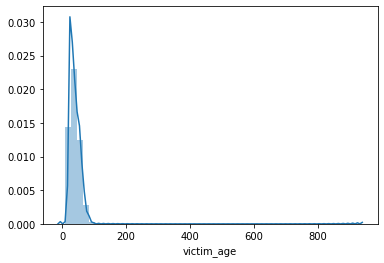

In [51]:
# Quick and dirty look at distribution of victim ages
sns.distplot(df['victim_age']);

In [52]:
# How old is our oldest victim? Our outliers look weird above!
df['victim_age'].max()

934

In [53]:
# Let's look closer at this outlier
df.loc[df['victim_age']== 934]

,911_call_type,type_of_incident,incident_address,division,sector,council_district,date_of_occurrence,year_of_occurrence,month_of_occurrence,day1_of_the_week,time_of_occurrence,day_of_the_year,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,nibrs_crime_category,x_coordinate,y_cordinate,zip_code,year,date,mnth_yr,month
date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-08-19,11R - BURG OF RES,BURGLARY OF HABITATION - FORCED ENTRY,221 STONEPORT DR,SOUTHEAST,350,D8,2014-08-19,2014,August,Tue,11:00,231,Individual,Black,Non-Hispanic or Latino,Male,934,8000,"GILLIOM,BARNEY,RAY",NaN,NaN,NaN,2517716.28153776,6947567.67146875,75217,2014,2014-08-19,August-2014,8


Most likely the age above is a typo. What other typos might we have?

In [54]:
# Looking for victim ages over 100 years old
df.loc[df['victim_age']>100]

,911_call_type,type_of_incident,incident_address,division,sector,council_district,date_of_occurrence,year_of_occurrence,month_of_occurrence,day1_of_the_week,time_of_occurrence,day_of_the_year,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,nibrs_crime_category,x_coordinate,y_cordinate,zip_code,year,date,mnth_yr,month
date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-08-19,11R - BURG OF RES,BURGLARY OF HABITATION - FORCED ENTRY,221 STONEPORT DR,SOUTHEAST,350,D8,2014-08-19,2014,August,Tue,11:00,231,Individual,Black,Non-Hispanic or Latino,Male,934,8000,"GILLIOM,BARNEY,RAY",NaN,NaN,NaN,2517716.28153776,6947567.67146875,75217,2014,2014-08-19,August-2014,8
2014-09-14,27 - DEAD PERSON,UNEXPLAINED DEATH (NO OFFENSE),3333 HIGH LARK DR,NORTHWEST,550,D6,2014-09-14,2014,September,Sun,18:00,257,Individual,White,Non-Hispanic or Latino,Female,102,8553,"THOMAS,KRAIG,EDWARD",8009,"TOMIYAMA,STEVEN,TAKESHI",NaN,2470024.07902209,7018222.82576184,75234,2014,2014-09-14,September-2014,9
2014-11-20,40/01 - OTHER,UNEXPLAINED DEATH (NO OFFENSE),6130 STEFANI DR,NORTH CENTRAL,650,D13,2014-11-20,2014,November,Thu,12:25,324,Individual,White,Non-Hispanic or Latino,Female,101,8127,"BRYANT,KEVIN,JAMES",NaN,NaN,NaN,2490160.51086201,7006507.90070093,75225,2014,2014-11-20,November-2014,11
2014-12-25,**PD REQUESTED BY FIRE,NATURAL DEATH (NO OFFENSE),5550 HARVEST HILL RD,NORTH CENTRAL,640,D13,2014-12-25,2014,December,Thu,20:53,359,Individual,White,Non-Hispanic or Latino,Female,102,9933,"DIETRICH,KENNETH,MICHAEL",9320,"SHUTKA,MICHAEL,JOSEPH",NaN,2486068.24312793,7022720.40928634,75230,2014,2014-12-25,December-2014,12
2015-01-01,40/01 - OTHER,ASSAULT (AGG) -DISCH FIREARM OCC BLDG/HOUSE/V...,12610 JUPITER RD,NORTHEAST,230,D9,2015-01-01,2015,January,Thu,00:00,1,Individual,Hispanic or Latino,Hispanic or Latino,Male,105,8378,"TRIGO,RONALD,DOMINGO",NaN,NaN,NaN,2526896.07026476,7003107.23427393,75238,2015,2015-01-01,January-2015,1
2015-01-06,40/01 - OTHER,NATURAL DEATH (NO OFFENSE),6410 WOFFORD DR,SOUTHEAST,310,D5,2015-01-06,2015,January,Tue,14:20,6,Individual,Hispanic or Latino,Hispanic or Latino,Female,101,10725,"SMITH,PAUL",5946,"FLORES III,LUCAS",NaN,2518357.12343192,6967327.7569485,75227,2015,2015-01-06,January-2015,1
2015-03-07,7X - MAJOR ACCIDENT,TRAF VIO - DUTY ON STRIKE FIXTURE/HWY LANDSCAP...,13622 SKYFROST DR,SOUTHEAST,350,D8,2015-03-07,2015,March,Sat,19:27,66,Individual,White,Non-Hispanic or Latino,Female,106,10683,"JOHNSON,FRANK",8924,"TIMMS,CHRISTOPHER,GLENN",NaN,2559184.26028143,6939800.34054676,75253,2015,2015-03-07,March-2015,3
2015-05-29,**PD REQUESTED BY FIRE,UNEXPLAINED DEATH (NO OFFENSE),6311 AUTUMN WOODS TRL,SOUTH CENTRAL,740,D3,2015-05-29,2015,May,Fri,16:20,149,Individual,Black,Non-Hispanic or Latino,Female,103,10871,"HARRIS,DARIN",NaN,NaN,NaN,2480077.80760226,6931282.11283259,75232,2015,2015-05-29,May-2015,5
2015-07-07,09 - THEFT,BURGLARY OF HABITATION - FORCED ENTRY,8223 SANTA CLARA DR,NORTHEAST,230,D9,2015-07-07,2015,July,Tue,16:00,188,Individual,Hispanic or Latino,Hispanic or Latino,Female,107,10074,"CONSTANTINE,ADAM,STEWART",NaN,NaN,NaN,2516090.00395042,6983140.38969326,75218,2015,2015-07-07,July-2015,7


While taking a closer look at these instances we see several ages that are over 122 (the recorded oldest person ever) and look like obvious typos. Since we can't tell exactly what age these victims were it's best we just drop these few instances, along with reporting  years under 2014.

In [55]:
# This pulls only the info we need - we are just keeing the relevant, non-typo data!
df = df.loc[(df['victim_age'] < 122) & (df['year'] > 2013), :]

In [56]:
# Sanity check on the year and victim age of this new df
df['victim_age'].describe()

count    339342.000000
mean         39.906952
std          15.102878
min          -9.000000
25%          28.000000
50%          37.000000
75%          50.000000
max         119.000000
Name: victim_age, dtype: float64

## 4. Deeper Variable Exploration
[Return to Outline](#Project-Outline:-Crime-Statistics)

Although we will also do a deep exploration of how these variables look in comparison to our other datasets after we combine them, let's just take a moment now to see what we can learn from our data!

**Main Goals of This Section:**
- look into distribution of individual features
- look into potential relationships between features

In [57]:
# Looking at type of 911 call breakdown and info
df['911_call_type'].describe(include = 'all')

count                   339342
unique                     119
top       11V - BURG MOTOR VEH
freq                     53837
Name: 911_call_type, dtype: object

Here is what the breakdown above let's us know:
- There are 118 unique types of 911 calls in our time period
- Total count of calls/types are around 300,000
- The most frequently occuring type of crime is Motor Vehicle burgulary, with around 48,000 incidences

We need a bit more info about all of what is happening in this feature. Let's take a look at what types of crimes are available in our dataset.

In [58]:
df['911_call_type'].unique()

array(['58 - ROUTINE INVESTIGATION', '09 - THEFT', 'WIC - WALK IN CASE #',
       '38 - MEET COMPLAINANT', '11B - BURG OF BUS', 'PSE/40 - OTHER',
       'PSE/09 - THEFT', 'PK - PARK CHECK', '11V - BURG MOTOR VEH',
       '40/01 - OTHER', '40 - OTHER', '11R - BURG OF RES',
       '20R - ROBBERY (REPORT)+1HR', '6X - MAJOR DIST (VIOLENCE)',
       '09V - UUMV', '09/01 - THEFT', 'PSE/31- CRIMINAL MISCHIEF',
       '20 - ROBBERY', '31 - CRIMINAL MISCHIEF', '16 - INJURED PERSON',
       'PSE/24 - LOST PROPERTY', '11V/01 - BURG MOTOR VEH',
       '07 - MINOR ACCIDENT', '23 - PARKING VIOLATION',
       '24 - ABANDONED PROPERTY', '7X - MAJOR ACCIDENT',
       'DAEF-DIST ARMED ENCOUNTER FOOT', '41/40 - OTHER - IN PROGRESS',
       '41/11R - BURG RES IN PROGRESS', '16A - INJURED PERSON W/AMB',
       '7XF - MAJOR ACCIDENT FREEWAY', '25 - CRIMINAL ASSAULT',
       '14 - STABBING, CUTTING', '**PD REQUESTED BY FIRE',
       '31/01 - CRIM MIS/PROG/NON FELO', '04 - 911 HANG UP',
       'PSE/11V - BURG

In [59]:
# Let's get a count of how frequently each of these types of crimes occur
df['911_call_type'].value_counts().head()

11V - BURG MOTOR VEH          53837
11R - BURG OF RES             31931
6X - MAJOR DIST (VIOLENCE)    28634
58 - ROUTINE INVESTIGATION    26692
31 - CRIMINAL MISCHIEF        20138
Name: 911_call_type, dtype: int64

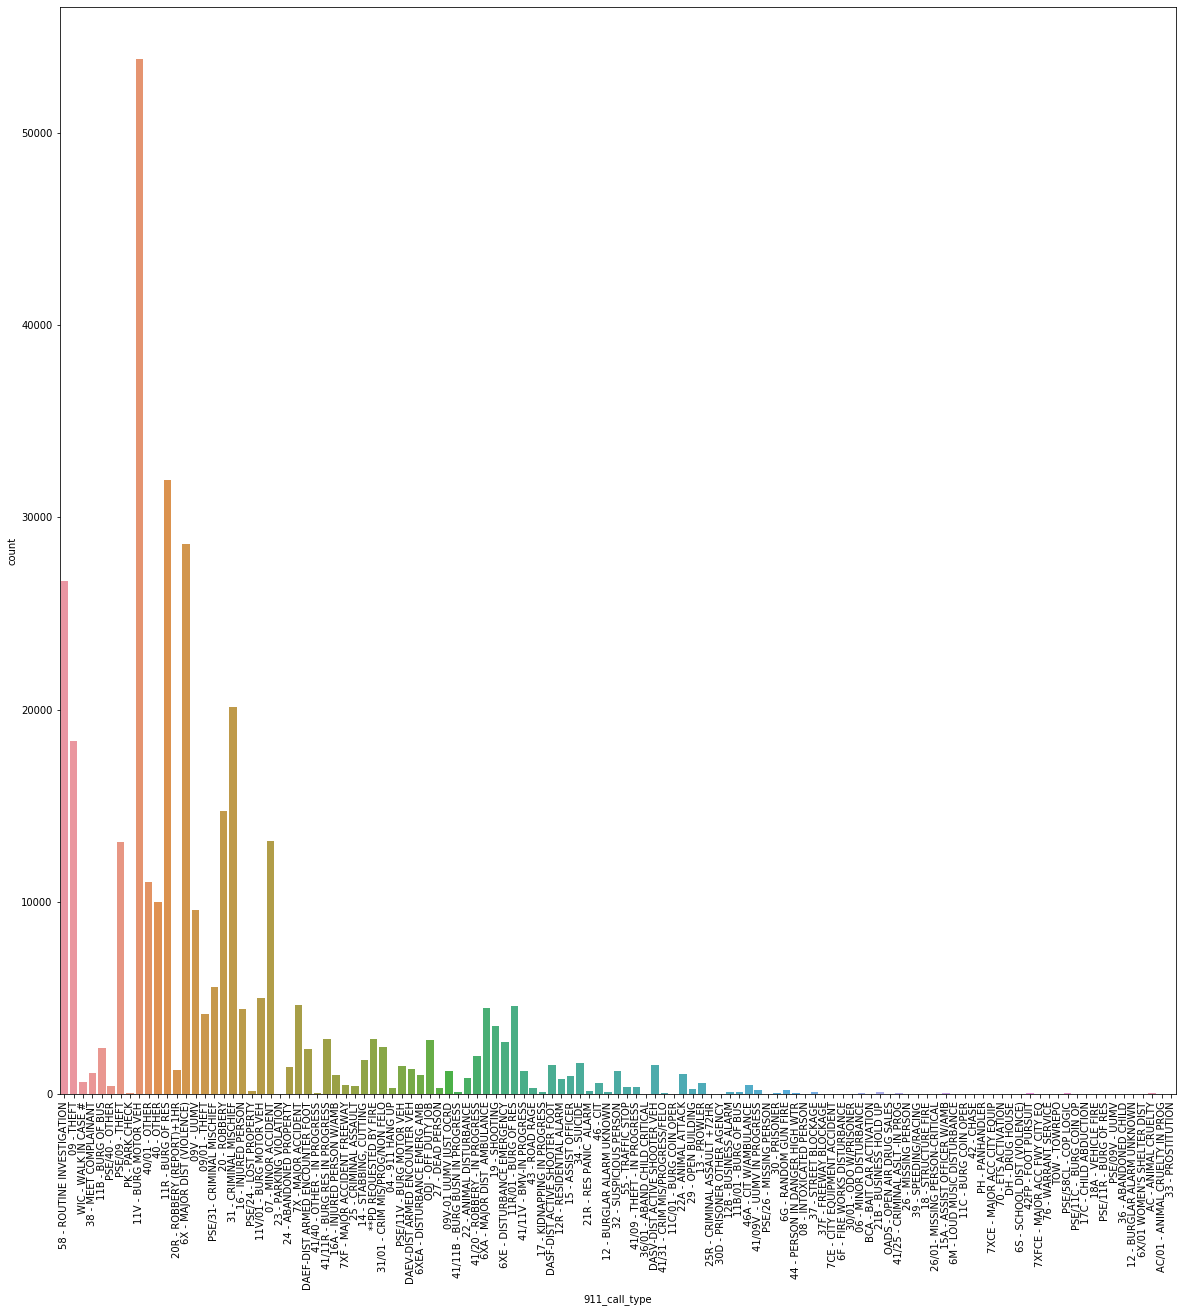

In [60]:
# Can we visualize this?
plt.figure(figsize= (20,20))
sns.countplot(df['911_call_type'])
plt.xticks(rotation = 90);

In [61]:
# How do these types of labels for crimes look in comparison to the other type qualifier?
df['nibrs_crime_category'].describe()

count                      176149
unique                         28
top       LARCENY/ THEFT OFFENSES
freq                        54123
Name: nibrs_crime_category, dtype: object

In [62]:
# What are the unique labels for this category?
df['nibrs_crime_category'].unique()

array(['MISCELLANEOUS', nan, 'FRAUD OFFENSES', 'COUNTERFEITING / FORGERY',
       'BURGLARY/ BREAKING & ENTERING', 'LARCENY/ THEFT OFFENSES',
       'ASSAULT OFFENSES', 'DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY',
       'ALL OTHER OFFENSES', 'MOTOR VEHICLE THEFT', 'EMBEZZELMENT',
       'ROBBERY', 'FAMILY OFFENSES, NONVIOLENT',
       'TRAFFIC VIOLATION - HAZARDOUS', 'HOMICIDE OFFENSES',
       'TRESPASS OF REAL PROPERTY', 'DISORDERLY CONDUCT',
       'ANIMAL OFFENSES', 'DRIVING UNDER THE INFLUENCE',
       'TRAFFIC VIOLATION - NON HAZARDOUS', 'ARSON', 'DRUNKENNESS',
       'DRUG/ NARCOTIC VIOLATIONS', 'WEAPON LAW VIOLATIONS',
       'KIDNAPPING/ ABDUCTION', 'LIQUOR LAW VIOLATIONS',
       'PORNOGRAPHY/ OBSCENE MATERIAL', 'HUMAN TRAFFICKING', 'BRIBERY'],
      dtype=object)

In [63]:
# How many of each type do we have?
df['nibrs_crime_category'].value_counts().head()

LARCENY/ THEFT OFFENSES                       54123
ASSAULT OFFENSES                              26500
DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY    22105
MISCELLANEOUS                                 21165
BURGLARY/ BREAKING & ENTERING                 17005
Name: nibrs_crime_category, dtype: int64

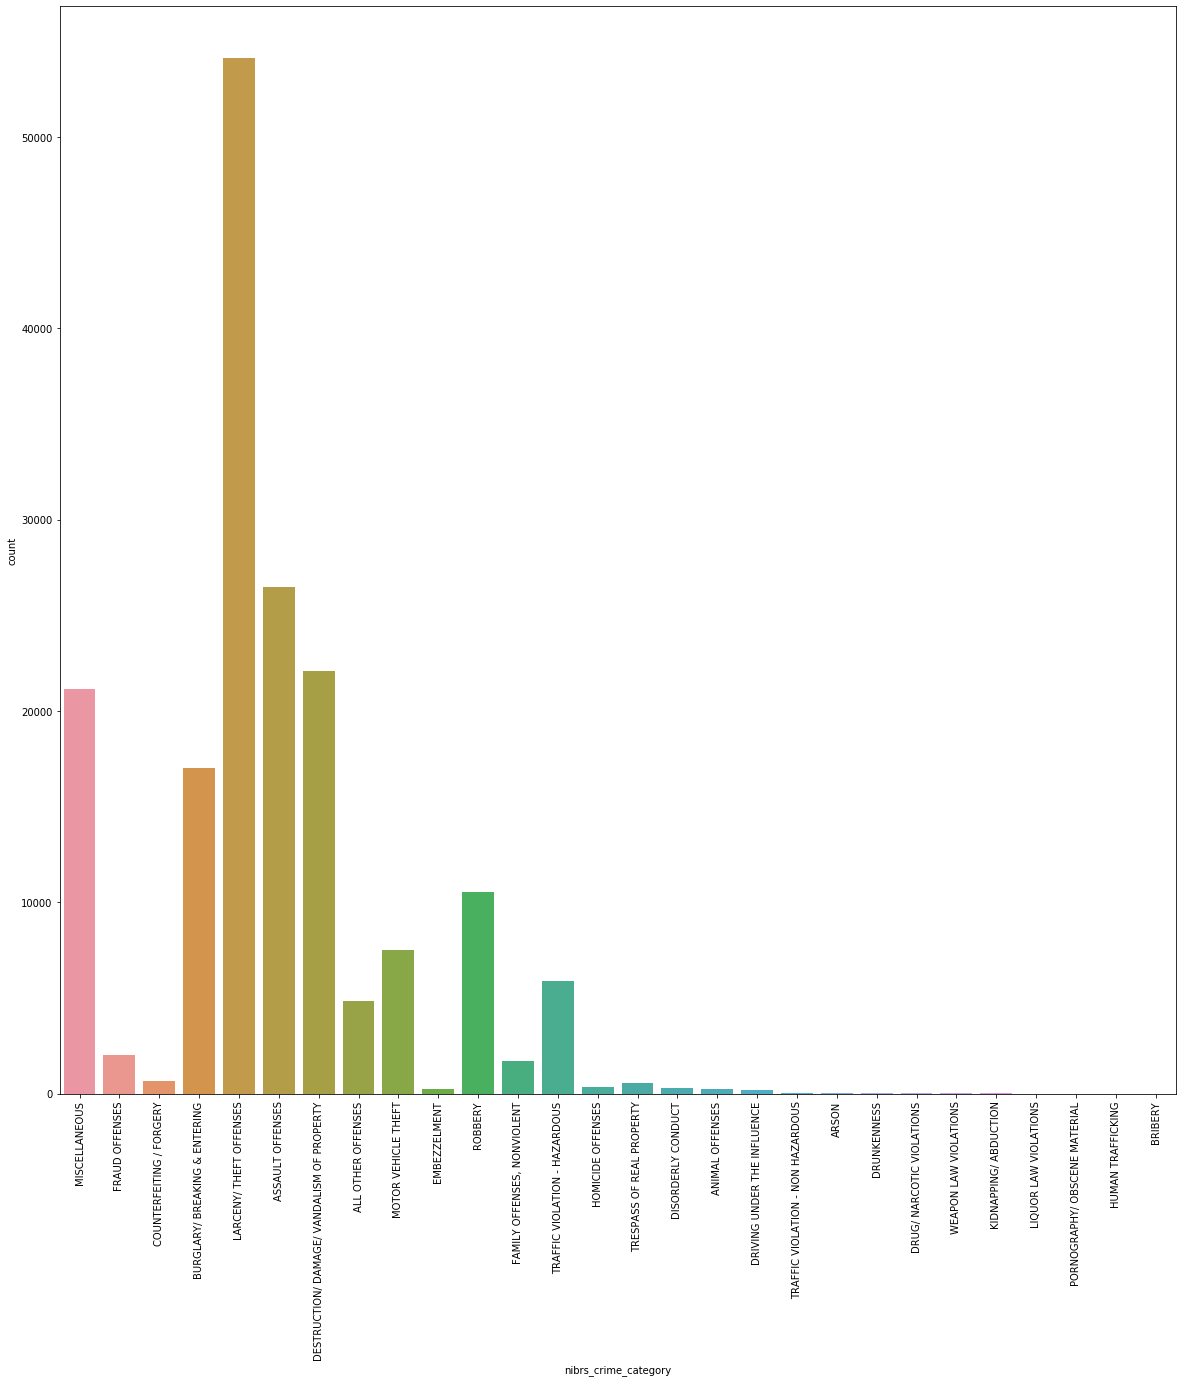

In [64]:
# Visualizing these stats
plt.figure(figsize = (20,20))
sns.countplot(df['nibrs_crime_category'])
plt.xticks(rotation = 90);

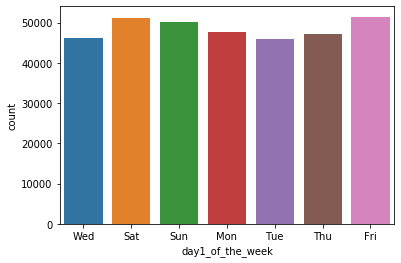

In [65]:
# What days of the week do we see the most crimes?
sns.countplot(df['day1_of_the_week'])

In [66]:
# What does time of occurrences look like?
df['time_of_occurrence'].describe()

count     339342
unique      1440
top        00:00
freq       12713
Name: time_of_occurrence, dtype: object

In [67]:
#  What does the count of times look like for this dataset?
df['time_of_occurrence'].value_counts().head()

00:00    12713
22:00    11198
18:00    10101
20:00     9707
12:00     9206
Name: time_of_occurrence, dtype: int64

In [68]:
# Are there any patterns in day of the year?
df['day_of_the_year'].describe()

count     339342
unique       366
top            1
freq        1315
Name: day_of_the_year, dtype: object

In [69]:
# What do the counts of this look like?
df['day_of_the_year'].value_counts().head()

1      1315
213    1260
182    1242
244    1232
152    1230
Name: day_of_the_year, dtype: int64

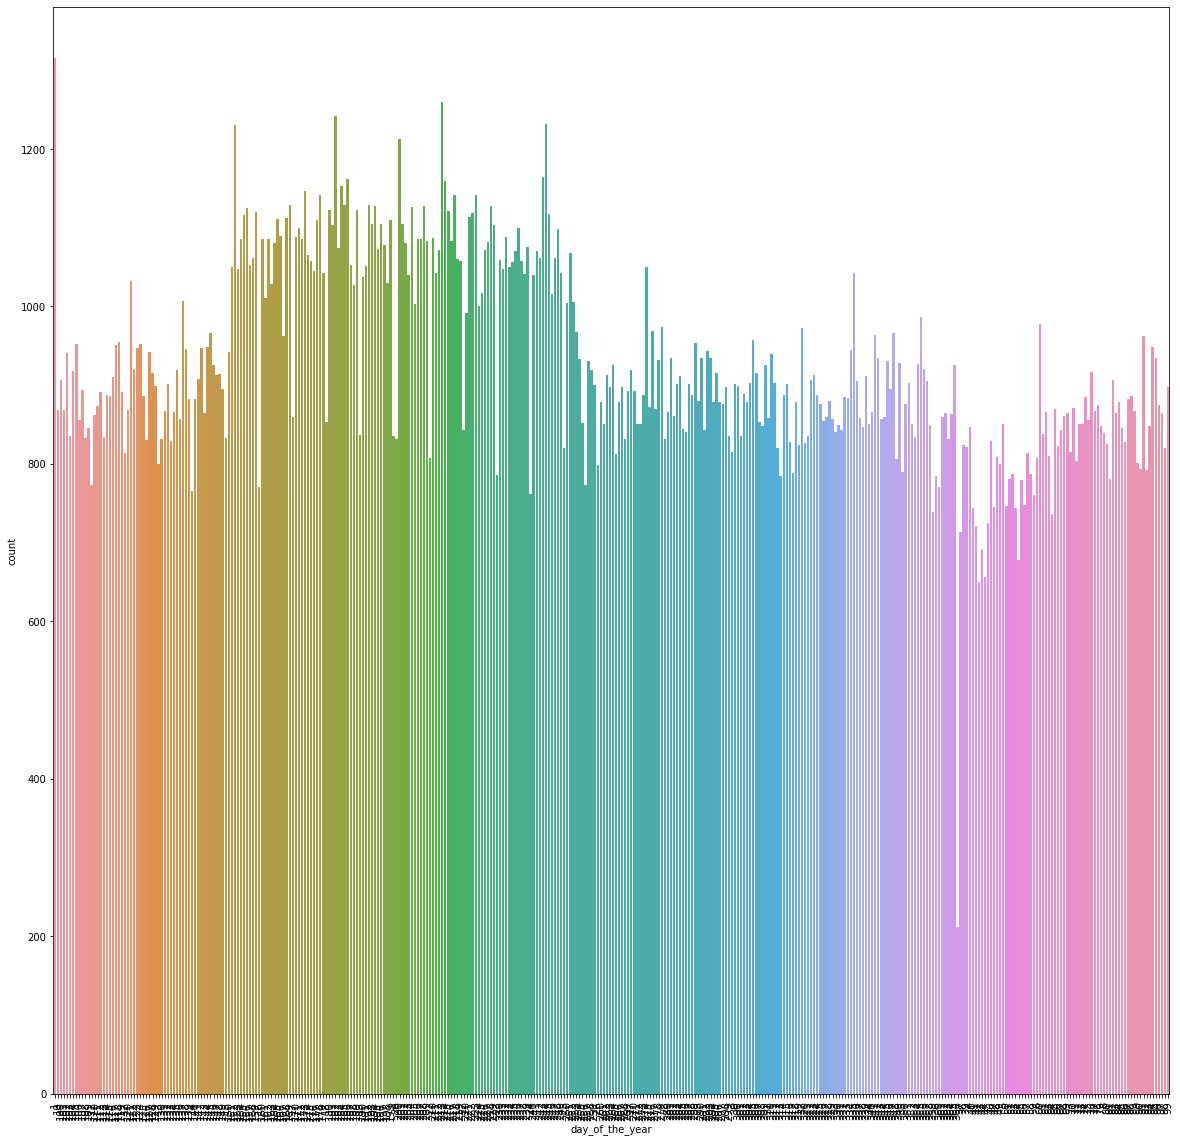

In [70]:
# What does this info look like, visually?
plt.figure(figsize = (20,20))
sns.countplot(df['day_of_the_year'])
plt.xticks(rotation = 90);

Although the visualization above is SO BEAUTIFUL, it really doesn't tell us much! Fortunately, we will dig more into dates in the data combination notebook for this project. Let's move on to exploring other variables for now!

In [71]:
# What does the distribution of victim race look like?
df['victim_race'].describe()

count     339342
unique         9
top        Black
freq      116577
Name: victim_race, dtype: object

In [72]:
# What are the races in our data?
df['victim_race'].unique()

array(['Hispanic or Latino', 'White', 'Black',
       'American Indian or Alaska Native', 'Asian', 'Unknown',
       'Middle Eastern', 'Native Hawaiian/Pacific Islander', 'TEST'],
      dtype=object)

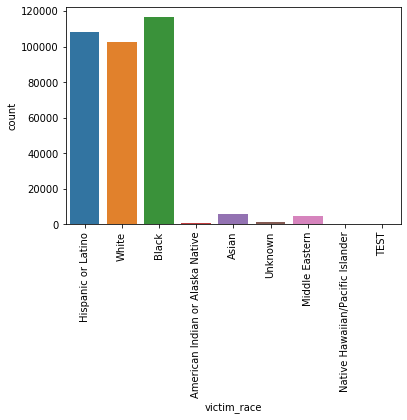

In [73]:
# Plotting counts of races of victims to look for a pattern
sns.countplot(df['victim_race'])
plt.xticks(rotation= 90);

In [74]:
# What does distribution of gender for victims look like?
df['victim_gender'].describe()

count     339342
unique         4
top         Male
freq      183583
Name: victim_gender, dtype: object

In [75]:
# What labels do we have for gender?
df['victim_gender'].unique()

array(['Female', 'Male', 'Unknown', 'TEST'], dtype=object)

In [76]:
# How many instances of each label do we have?
df['victim_gender'].value_counts()

Male       183583
Female     155570
Unknown       182
TEST            7
Name: victim_gender, dtype: int64

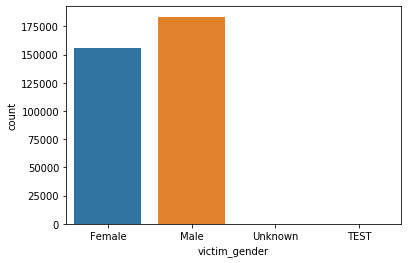

In [77]:
# Plotting distribution of gender
sns.countplot(df['victim_gender'])

In [78]:
# Looking at victim type
df['victim_type'].describe()

count         339342
unique             7
top       Individual
freq          338964
Name: victim_type, dtype: object

In [79]:
# What labels do we have for victim type?
df['victim_type'].unique()

array(['Individual', 'Business', 'Law Enforcement Offi', 'Government',
       'Other', 'Unknown', 'Society/Public'], dtype=object)

In [80]:
# How many of each label do we have in this dataset?
df['victim_type'].value_counts()

Individual              338964
Society/Public             305
Law Enforcement Offi        34
Other                       18
Government                  14
Business                     6
Unknown                      1
Name: victim_type, dtype: int64

In [81]:
# What does victim ethnicity look like?
df['victim_ethnicity'].describe()


count                     339342
unique                         3
top       Non-Hispanic or Latino
freq                      231117
Name: victim_ethnicity, dtype: object

In [82]:
# What are the unique ethnicities in our dataset?
df['victim_ethnicity'].unique()

array(['Hispanic or Latino', 'Non-Hispanic or Latino', 'Unknown'],
      dtype=object)

In [83]:
# Looking at revised victim ages
df['victim_age'].describe()

count    339342.000000
mean         39.906952
std          15.102878
min          -9.000000
25%          28.000000
50%          37.000000
75%          50.000000
max         119.000000
Name: victim_age, dtype: float64

In [84]:
# What unique ages do we have?
df['victim_age'].unique()

array([ 38,  34,  60,  27,  64,  37,  28,  50,  46,  39,  90,  33,  31,
        35,  51,  62,  54,  43,  21,  56,  30,  59,  23,  40,  53,  26,
        29,  65,  66,  79,  73,  52,  69,  83,  49,  47,  41,  57,  48,
        77,  87,  74,  55,  44,  42,  25,  70,  63,  19,  72,  45,  89,
        67,  36,  58,  24,  61,  32,  22,  68,  82,  20,  71,  80,  78,
        75,  18,  17,  88,  86, 100,  13,  84,  81,  93,  91,   4,  85,
        76,  94,   6,  96,  95,  16,  92,  97,  11,   0,   8,  14,   3,
         2,   9,  98,  15, 102,   5,  12,   7,  10, 101, 105,   1, 106,
       103, 107,  99,  -9, 104, 118, 119, 108], dtype=int64)

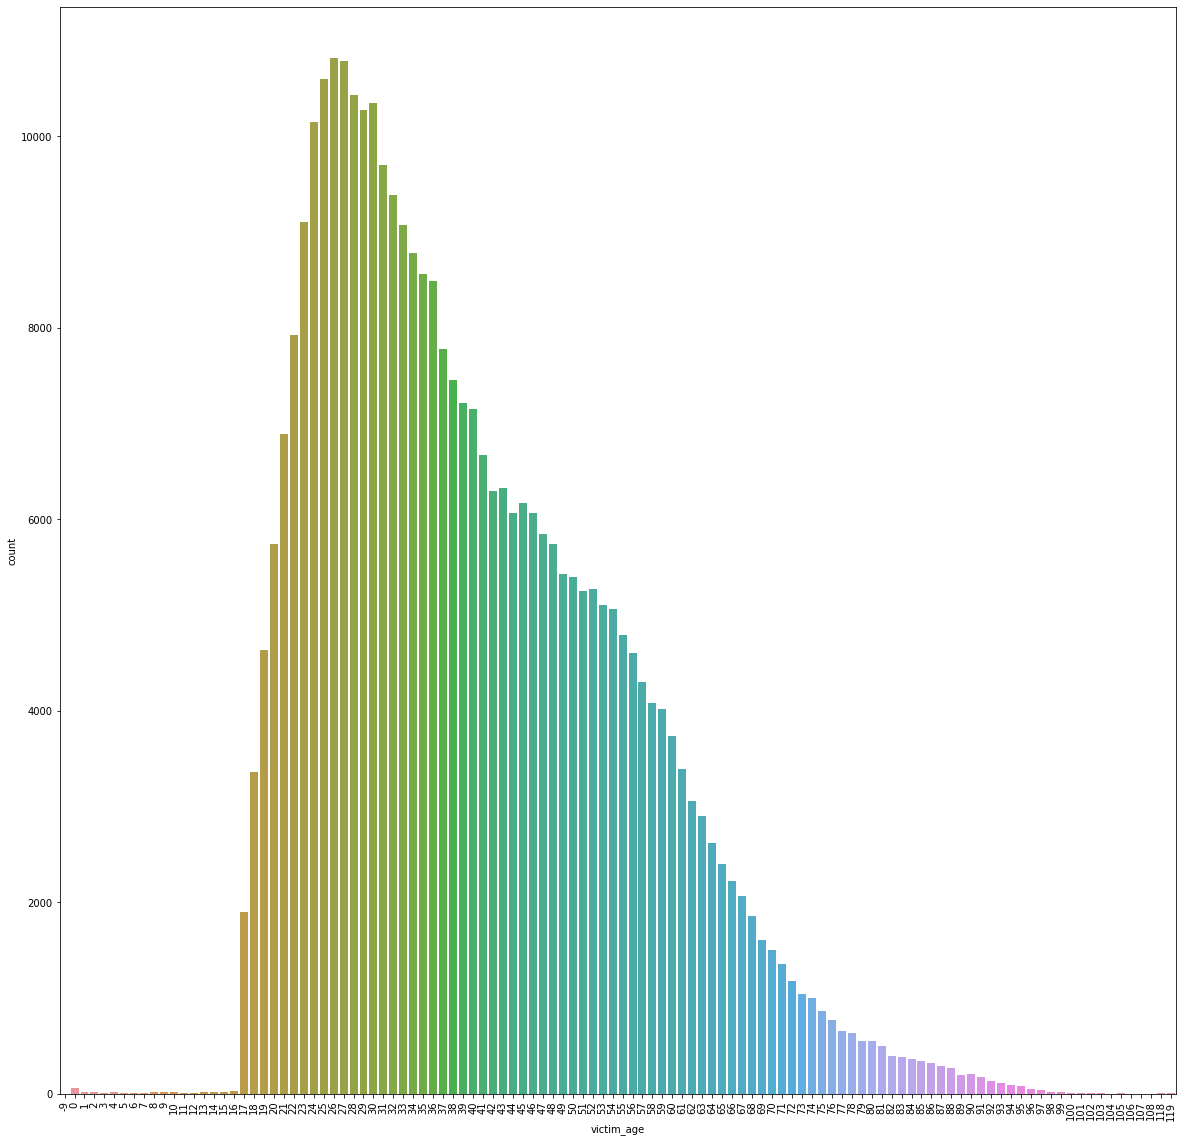

In [85]:
#Plotting this distro
plt.figure(figsize= (20,20))
sns.countplot(df['victim_age'])
plt.xticks(rotation = 90);

In [86]:
# Are there any trends in reporting officers?
df['responding_officer_#1__badge_no'].describe()

count     339342
unique      3657
top        94392
freq        6440
Name: responding_officer_#1__badge_no, dtype: object

In [87]:
# Looking at number of calls per badge number
df['responding_officer_#1__badge_no'].value_counts().head()

94392     6440
118918    3907
106291    2972
120365    2855
6751       852
Name: responding_officer_#1__badge_no, dtype: int64

In [88]:
# Since we saw a huge number of calls for the officer listed below let's take a closer look
main_officer = df.loc[df['responding_officer_#1__badge_no']== '94392']

In [89]:
# What calls was this officer responsible for?
main_officer.describe(include = 'all')

,911_call_type,type_of_incident,incident_address,division,sector,council_district,date_of_occurrence,year_of_occurrence,month_of_occurrence,day1_of_the_week,time_of_occurrence,day_of_the_year,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,nibrs_crime_category,x_coordinate,y_cordinate,zip_code,year,date,mnth_yr,month
count,6440,6440,6440,6438,6438,6438,6440,6440,6440,6440,6440,6440,6440,6440,6440,6440,6440.000000,6440,6440,51,51,3379,6440,6440,6438,6440.000000,6440,6440,6440.000000
unique,15,90,4777,7,35,15,1757,6,12,7,404,366,2,8,3,3,NaN,1,1,7,7,8,5371,5371,61,NaN,1757,69,NaN
top,PSE/09 - THEFT,BMV,1500 MARILLA ST,CENTRAL,120,D14,2015-06-17 00:00:00,2015,July,Wed,18:00,117,Individual,White,Non-Hispanic or Latino,Female,NaN,94392,"WILLIS,LINDA,M",120255,"PALOMO,MAYRA,G",LARCENY/ THEFT OFFENSES,2491521.7916,6969611.07489,75204,NaN,2015-06-17,December-2018,NaN
freq,3772,803,26,1311,328,1004,15,1353,697,1149,389,37,6439,2976,5136,3232,NaN,6440,6440,38,38,2536,21,21,383,NaN,15,167,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.623602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.592081,NaN,NaN,6.624068
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.609617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.639671,NaN,NaN,3.321441
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN,4.000000


In [90]:
# What does crime distribution by zipcode look like?
df['zip_code'].describe()

count     339272
unique       107
top        75217
freq       20109
Name: zip_code, dtype: object

In [91]:
# How many of each zip code do we have?
df['zip_code'].value_counts()

75217    20109
75216    18122
75228    18090
75243    16791
75220    14987
75227    13625
75211    13509
75204    11669
75231    11574
75215    11530
75241    10720
75237     9309
75206     9237
75287     8913
75224     8554
75229     7854
75240     7684
75201     7303
75208     7030
75232     6976
75219     6878
75238     6461
75214     6046
75212     6044
75235     5726
75203     5682
75210     4884
75218     4443
75254     4287
75248     4160
75202     4115
75226     3933
75230     3867
75253     3819
75223     3795
75236     3467
75233     3467
75247     3419
75207     3279
75209     2918
75252     2866
75225     2567
75249     2156
75251     1761
75244     1452
75205     1159
75246     1006
75234      968
75051      181
75019      144
75116      124
75088       71
75042       45
75040       41
75080       36
75159       33
75007       30
75134       27
75089       27
75150       25
75115       25
75149       23
75052       19
75137       19
75060       18
75081       18
75062     

This is some very interesting information! Let's go ahead and add it to the other data we've collected and do some more in-depth exploration!

## 5. Creating a Aggregated Dataframe for Working
[Return to Outline](#Project-Outline:-Crime-Statistics)

Since we are going to use this data for predictive reasons let's go ahead and make an aggregated dataframe with the most important information.

In [92]:
# Creating a new df to manipulate with only info we need
crimes_df= df.copy()

In [93]:
# Droppping columns we really don't need for aggregation
crimes_df= crimes_df[['date', 'month', 'day1_of_the_week','time_of_occurrence', 'day_of_the_year', 'year', 'mnth_yr', 'zip_code',
                      '911_call_type']]

In [94]:
#Resetting index back to 0
crimes_df.reset_index(inplace = True)

In [95]:
# Dropping date_index
crimes_df.drop(axis = 1, columns = 'date_index', inplace = True)

In [96]:
# Sanity check: Does our information look like we expected?
crimes_df.head()

,date,month,day1_of_the_week,time_of_occurrence,day_of_the_year,year,mnth_yr,zip_code,911_call_type
0,2014-01-01,1,Wed,00:00,1,2014,January-2014,75217,58 - ROUTINE INVESTIGATION
1,2014-01-01,1,Wed,08:00,1,2014,January-2014,75206,09 - THEFT
2,2014-01-01,1,Wed,00:00,1,2014,January-2014,75215,58 - ROUTINE INVESTIGATION
3,2014-01-01,1,Wed,12:00,1,2014,January-2014,75287,58 - ROUTINE INVESTIGATION
4,2014-01-01,1,Wed,08:00,1,2014,January-2014,75206,58 - ROUTINE INVESTIGATION


In [97]:
# Making dummies columns for these features
dummies = pd.get_dummies(crimes_df[[ 'day1_of_the_week', 'year', 'mnth_yr', 'zip_code', '911_call_type']])

In [98]:
# What do our new "dummies" columns look like?
dummies.head()

,year,day1_of_the_week_Fri,day1_of_the_week_Mon,day1_of_the_week_Sat,day1_of_the_week_Sun,day1_of_the_week_Thu,day1_of_the_week_Tue,day1_of_the_week_Wed,mnth_yr_April-2014,mnth_yr_April-2015,mnth_yr_April-2016,mnth_yr_April-2017,mnth_yr_April-2018,mnth_yr_April-2019,mnth_yr_August-2014,mnth_yr_August-2015,mnth_yr_August-2016,mnth_yr_August-2017,mnth_yr_August-2018,mnth_yr_August-2019,mnth_yr_December-2014,mnth_yr_December-2015,mnth_yr_December-2016,mnth_yr_December-2017,mnth_yr_December-2018,mnth_yr_February-2014,mnth_yr_February-2015,mnth_yr_February-2016,mnth_yr_February-2017,mnth_yr_February-2018,mnth_yr_February-2019,mnth_yr_January-2014,mnth_yr_January-2015,mnth_yr_January-2016,mnth_yr_January-2017,mnth_yr_January-2018,mnth_yr_January-2019,mnth_yr_July-2014,mnth_yr_July-2015,mnth_yr_July-2016,mnth_yr_July-2017,mnth_yr_July-2018,mnth_yr_July-2019,mnth_yr_June-2014,mnth_yr_June-2015,mnth_yr_June-2016,mnth_yr_June-2017,mnth_yr_June-2018,mnth_yr_June-2019,mnth_yr_March-2014,mnth_yr_March-2015,mnth_yr_March-2016,mnth_yr_March-2017,mnth_yr_March-2018,mnth_yr_March-2019,mnth_yr_May-2014,mnth_yr_May-2015,mnth_yr_May-2016,mnth_yr_May-2017,mnth_yr_May-2018,mnth_yr_May-2019,mnth_yr_November-2014,mnth_yr_November-2015,mnth_yr_November-2016,mnth_yr_November-2017,mnth_yr_November-2018,mnth_yr_October-2014,mnth_yr_October-2015,mnth_yr_October-2016,mnth_yr_October-2017,mnth_yr_October-2018,mnth_yr_September-2014,mnth_yr_September-2015,mnth_yr_September-2016,mnth_yr_September-2017,mnth_yr_September-2018,mnth_yr_September-2019,zip_code_0,zip_code_33019,zip_code_74212,zip_code_74243,zip_code_75001,zip_code_75006,zip_code_75007,zip_code_75019,zip_code_75023,zip_code_75024,zip_code_75026,zip_code_75032,zip_code_75035,zip_code_75039,zip_code_75040,zip_code_75041,zip_code_75042,zip_code_75043,zip_code_75044,zip_code_75048,zip_code_75050,zip_code_75051,zip_code_75052,zip_code_75060,zip_code_75061,zip_code_75062,zip_code_75063,zip_code_75074,zip_code_75075,zip_code_75080,zip_code_75081,zip_code_75082,zip_code_75087,zip_code_75088,zip_code_75089,zip_code_75093,zip_code_75104,zip_code_75115,zip_code_75116,zip_code_75119,zip_code_75126,zip_code_75134,zip_code_75137,zip_code_75141,zip_code_75146,zip_code_75149,zip_code_75150,zip_code_75154,zip_code_75159,zip_code_75180,zip_code_75181,zip_code_75182,zip_code_75201,zip_code_75202,zip_code_75203,zip_code_75204,zip_code_75205,zip_code_75206,zip_code_75207,zip_code_75208,zip_code_75209,zip_code_75210,zip_code_75211,zip_code_75212,zip_code_75213,zip_code_75214,zip_code_75215,zip_code_75216,zip_code_75217,zip_code_75218,zip_code_75219,zip_code_75220,zip_code_75223,zip_code_75224,zip_code_75225,zip_code_75226,zip_code_75227,zip_code_75228,zip_code_75229,zip_code_75230,zip_code_75231,zip_code_75232,zip_code_75233,zip_code_75234,zip_code_75235,zip_code_75236,zip_code_75237,zip_code_75238,zip_code_75240,zip_code_75241,zip_code_75243,zip_code_75244,zip_code_75246,zip_code_75247,zip_code_75248,zip_code_75249,zip_code_75251,zip_code_75252,zip_code_75253,zip_code_75254,zip_code_75255,zip_code_75261,zip_code_75287,zip_code_75288,zip_code_75390,zip_code_76234,zip_code_77521,911_call_type_**PD REQUESTED BY FIRE,911_call_type_04 - 911 HANG UP,911_call_type_06 - MINOR DISTURBANCE,911_call_type_07 - MINOR ACCIDENT,911_call_type_08 - INTOXICATED PERSON,911_call_type_09 - THEFT,911_call_type_09/01 - THEFT,911_call_type_09V - UUMV,911_call_type_09V-01 UUMV JUST OCRD,911_call_type_11B - BURG OF BUS,911_call_type_11B/01 - BURG OF BUS,911_call_type_11C - BURG COIN OPER,911_call_type_11C/01 - BURG COIN OPER,911_call_type_11R - BURG OF RES,911_call_type_11R/01 - BURG OF RES,911_call_type_11V - BURG MOTOR VEH,911_call_type_11V/01 - BURG MOTOR VEH,911_call_type_12 - BURGLAR ALARM UKNOWN,911_call_type_12 - BURGLAR ALARM UNKNOWN,911_call_type_12B - BUSINESS ALARM,911_call_type_12R - RESIDENTIAL ALARM,911_call_type_13 - PROWLER,"911_call_type_14 - STABBING, CUTTING",911_call_type_15 - ASSIST OFFICER,911_call_type_15A - ASSIST OFFICER

In [99]:
# Now we need to add our dummies back to our crimes df
crimes_df = pd.concat([crimes_df, dummies], axis = 1)

In [100]:
# Sanity check: Did our dataframes combine correctly?
crimes_df.head()

,date,month,day1_of_the_week,time_of_occurrence,day_of_the_year,year,mnth_yr,zip_code,911_call_type,year,day1_of_the_week_Fri,day1_of_the_week_Mon,day1_of_the_week_Sat,day1_of_the_week_Sun,day1_of_the_week_Thu,day1_of_the_week_Tue,day1_of_the_week_Wed,mnth_yr_April-2014,mnth_yr_April-2015,mnth_yr_April-2016,mnth_yr_April-2017,mnth_yr_April-2018,mnth_yr_April-2019,mnth_yr_August-2014,mnth_yr_August-2015,mnth_yr_August-2016,mnth_yr_August-2017,mnth_yr_August-2018,mnth_yr_August-2019,mnth_yr_December-2014,mnth_yr_December-2015,mnth_yr_December-2016,mnth_yr_December-2017,mnth_yr_December-2018,mnth_yr_February-2014,mnth_yr_February-2015,mnth_yr_February-2016,mnth_yr_February-2017,mnth_yr_February-2018,mnth_yr_February-2019,mnth_yr_January-2014,mnth_yr_January-2015,mnth_yr_January-2016,mnth_yr_January-2017,mnth_yr_January-2018,mnth_yr_January-2019,mnth_yr_July-2014,mnth_yr_July-2015,mnth_yr_July-2016,mnth_yr_July-2017,mnth_yr_July-2018,mnth_yr_July-2019,mnth_yr_June-2014,mnth_yr_June-2015,mnth_yr_June-2016,mnth_yr_June-2017,mnth_yr_June-2018,mnth_yr_June-2019,mnth_yr_March-2014,mnth_yr_March-2015,mnth_yr_March-2016,mnth_yr_March-2017,mnth_yr_March-2018,mnth_yr_March-2019,mnth_yr_May-2014,mnth_yr_May-2015,mnth_yr_May-2016,mnth_yr_May-2017,mnth_yr_May-2018,mnth_yr_May-2019,mnth_yr_November-2014,mnth_yr_November-2015,mnth_yr_November-2016,mnth_yr_November-2017,mnth_yr_November-2018,mnth_yr_October-2014,mnth_yr_October-2015,mnth_yr_October-2016,mnth_yr_October-2017,mnth_yr_October-2018,mnth_yr_September-2014,mnth_yr_September-2015,mnth_yr_September-2016,mnth_yr_September-2017,mnth_yr_September-2018,mnth_yr_September-2019,zip_code_0,zip_code_33019,zip_code_74212,zip_code_74243,zip_code_75001,zip_code_75006,zip_code_75007,zip_code_75019,zip_code_75023,zip_code_75024,zip_code_75026,zip_code_75032,zip_code_75035,zip_code_75039,zip_code_75040,zip_code_75041,zip_code_75042,zip_code_75043,zip_code_75044,zip_code_75048,zip_code_75050,zip_code_75051,zip_code_75052,zip_code_75060,zip_code_75061,zip_code_75062,zip_code_75063,zip_code_75074,zip_code_75075,zip_code_75080,zip_code_75081,zip_code_75082,zip_code_75087,zip_code_75088,zip_code_75089,zip_code_75093,zip_code_75104,zip_code_75115,zip_code_75116,zip_code_75119,zip_code_75126,zip_code_75134,zip_code_75137,zip_code_75141,zip_code_75146,zip_code_75149,zip_code_75150,zip_code_75154,zip_code_75159,zip_code_75180,zip_code_75181,zip_code_75182,zip_code_75201,zip_code_75202,zip_code_75203,zip_code_75204,zip_code_75205,zip_code_75206,zip_code_75207,zip_code_75208,zip_code_75209,zip_code_75210,zip_code_75211,zip_code_75212,zip_code_75213,zip_code_75214,zip_code_75215,zip_code_75216,zip_code_75217,zip_code_75218,zip_code_75219,zip_code_75220,zip_code_75223,zip_code_75224,zip_code_75225,zip_code_75226,zip_code_75227,zip_code_75228,zip_code_75229,zip_code_75230,zip_code_75231,zip_code_75232,zip_code_75233,zip_code_75234,zip_code_75235,zip_code_75236,zip_code_75237,zip_code_75238,zip_code_75240,zip_code_75241,zip_code_75243,zip_code_75244,zip_code_75246,zip_code_75247,zip_code_75248,zip_code_75249,zip_code_75251,zip_code_75252,zip_code_75253,zip_code_75254,zip_code_75255,zip_code_75261,zip_code_75287,zip_code_75288,zip_code_75390,zip_code_76234,zip_code_77521,911_call_type_**PD REQUESTED BY FIRE,911_call_type_04 - 911 HANG UP,911_call_type_06 - MINOR DISTURBANCE,911_call_type_07 - MINOR ACCIDENT,911_call_type_08 - INTOXICATED PERSON,911_call_type_09 - THEFT,911_call_type_09/01 - THEFT,911_call_type_09V - UUMV,911_call_type_09V-01 UUMV JUST OCRD,911_call_type_11B - BURG OF BUS,911_call_type_11B/01 - BURG OF BUS,911_call_type_11C - BURG COIN OPER,911_call_type_11C/01 - BURG COIN OPER,911_call_type_11R - BURG OF RES,911_call_type_11R/01 - BURG OF RES,911_call_type_11V - BURG MOTOR VEH,911_call_type_11V/01 - BURG MOTOR VEH,911_call_type_12 - BURGLAR ALARM UKNOWN,911_call_type_12 - BURGLAR ALARM UNKNOWN,911_call_type_12B - BUSINESS ALARM,911_call_type_12R - RESIDENTIAL ALARM,911_call_type_13 - PROWLER,"911_cal

Since we have SOOOOOOO many columns it's best that we take this info and aggregate it by doing a groupby function!

In [101]:
# Creating a new df without the original variables we just dummied
crimes_agg = crimes_df.copy()

In [102]:
# Dropping month and year!
crimes_agg.drop(axis = 1, columns = ['month', 'year'], inplace = True)

In [103]:
# Making this HUGE dataframe smaller by grouping by date and sum
crimes_agg = crimes_agg.groupby('date').sum()

In [104]:
# Sanity check: did it work?
crimes_agg.head()

,day1_of_the_week_Fri,day1_of_the_week_Mon,day1_of_the_week_Sat,day1_of_the_week_Sun,day1_of_the_week_Thu,day1_of_the_week_Tue,day1_of_the_week_Wed,mnth_yr_April-2014,mnth_yr_April-2015,mnth_yr_April-2016,mnth_yr_April-2017,mnth_yr_April-2018,mnth_yr_April-2019,mnth_yr_August-2014,mnth_yr_August-2015,mnth_yr_August-2016,mnth_yr_August-2017,mnth_yr_August-2018,mnth_yr_August-2019,mnth_yr_December-2014,mnth_yr_December-2015,mnth_yr_December-2016,mnth_yr_December-2017,mnth_yr_December-2018,mnth_yr_February-2014,mnth_yr_February-2015,mnth_yr_February-2016,mnth_yr_February-2017,mnth_yr_February-2018,mnth_yr_February-2019,mnth_yr_January-2014,mnth_yr_January-2015,mnth_yr_January-2016,mnth_yr_January-2017,mnth_yr_January-2018,mnth_yr_January-2019,mnth_yr_July-2014,mnth_yr_July-2015,mnth_yr_July-2016,mnth_yr_July-2017,mnth_yr_July-2018,mnth_yr_July-2019,mnth_yr_June-2014,mnth_yr_June-2015,mnth_yr_June-2016,mnth_yr_June-2017,mnth_yr_June-2018,mnth_yr_June-2019,mnth_yr_March-2014,mnth_yr_March-2015,mnth_yr_March-2016,mnth_yr_March-2017,mnth_yr_March-2018,mnth_yr_March-2019,mnth_yr_May-2014,mnth_yr_May-2015,mnth_yr_May-2016,mnth_yr_May-2017,mnth_yr_May-2018,mnth_yr_May-2019,mnth_yr_November-2014,mnth_yr_November-2015,mnth_yr_November-2016,mnth_yr_November-2017,mnth_yr_November-2018,mnth_yr_October-2014,mnth_yr_October-2015,mnth_yr_October-2016,mnth_yr_October-2017,mnth_yr_October-2018,mnth_yr_September-2014,mnth_yr_September-2015,mnth_yr_September-2016,mnth_yr_September-2017,mnth_yr_September-2018,mnth_yr_September-2019,zip_code_0,zip_code_33019,zip_code_74212,zip_code_74243,zip_code_75001,zip_code_75006,zip_code_75007,zip_code_75019,zip_code_75023,zip_code_75024,zip_code_75026,zip_code_75032,zip_code_75035,zip_code_75039,zip_code_75040,zip_code_75041,zip_code_75042,zip_code_75043,zip_code_75044,zip_code_75048,zip_code_75050,zip_code_75051,zip_code_75052,zip_code_75060,zip_code_75061,zip_code_75062,zip_code_75063,zip_code_75074,zip_code_75075,zip_code_75080,zip_code_75081,zip_code_75082,zip_code_75087,zip_code_75088,zip_code_75089,zip_code_75093,zip_code_75104,zip_code_75115,zip_code_75116,zip_code_75119,zip_code_75126,zip_code_75134,zip_code_75137,zip_code_75141,zip_code_75146,zip_code_75149,zip_code_75150,zip_code_75154,zip_code_75159,zip_code_75180,zip_code_75181,zip_code_75182,zip_code_75201,zip_code_75202,zip_code_75203,zip_code_75204,zip_code_75205,zip_code_75206,zip_code_75207,zip_code_75208,zip_code_75209,zip_code_75210,zip_code_75211,zip_code_75212,zip_code_75213,zip_code_75214,zip_code_75215,zip_code_75216,zip_code_75217,zip_code_75218,zip_code_75219,zip_code_75220,zip_code_75223,zip_code_75224,zip_code_75225,zip_code_75226,zip_code_75227,zip_code_75228,zip_code_75229,zip_code_75230,zip_code_75231,zip_code_75232,zip_code_75233,zip_code_75234,zip_code_75235,zip_code_75236,zip_code_75237,zip_code_75238,zip_code_75240,zip_code_75241,zip_code_75243,zip_code_75244,zip_code_75246,zip_code_75247,zip_code_75248,zip_code_75249,zip_code_75251,zip_code_75252,zip_code_75253,zip_code_75254,zip_code_75255,zip_code_75261,zip_code_75287,zip_code_75288,zip_code_75390,zip_code_76234,zip_code_77521,911_call_type_**PD REQUESTED BY FIRE,911_call_type_04 - 911 HANG UP,911_call_type_06 - MINOR DISTURBANCE,911_call_type_07 - MINOR ACCIDENT,911_call_type_08 - INTOXICATED PERSON,911_call_type_09 - THEFT,911_call_type_09/01 - THEFT,911_call_type_09V - UUMV,911_call_type_09V-01 UUMV JUST OCRD,911_call_type_11B - BURG OF BUS,911_call_type_11B/01 - BURG OF BUS,911_call_type_11C - BURG COIN OPER,911_call_type_11C/01 - BURG COIN OPER,911_call_type_11R - BURG OF RES,911_call_type_11R/01 - BURG OF RES,911_call_type_11V - BURG MOTOR VEH,911_call_type_11V/01 - BURG MOTOR VEH,911_call_type_12 - BURGLAR ALARM UKNOWN,911_call_type_12 - BURGLAR ALARM UNKNOWN,911_call_type_12B - BUSINESS ALARM,911_call_type_12R - RESIDENTIAL ALARM,911_call_type_13 - PROWLER,"911_call_type_14 - STABBING, CUTTING",911_call_type_15 - ASSIST OFFICER,911_call_type_15A - ASSIST OFFICER W/AM

After working with our census and weather data I realized that Dallas PD takes calls outside of the city of Dallas limits, thus causing us to have waaaaaaayyyyy more zip codes than we need. Let's see if we can get rid of any zip code/call that is outside of the city limits.

In [105]:
# Making a list of zip codes within the limits of Dallas proper
zip_codes= {'zip_code': [75201, 75202,75203,75204,75205,75206,75207,75208,75209,75210,75211,75212,75214,75215,
            75216,75217,75218,75219,75220,75221,75222,75223,75224,75225,75226,75227,75228,75229, 
            75230, 75231, 75232, 75233, 75234, 75235, 75236, 75237, 75238, 75240, 75241, 75242, 75243,
            75244, 75245, 75246, 75247, 75248, 75249, 75250, 75251, 75252, 75253, 75254, 75258, 75260, 
            75261, 75262, 75263, 75264, 75265, 75266, 75267, 75270, 75275, 75277, 75283, 75284, 75285, 
            75286, 75287,75301, 75303, 75310, 75312, 75313,75315,75320,75323,75326,75334, 75366, 75339, 
            75340, 75342, 75343, 75344, 75354, 75355, 75356, 75357, 75358, 75359, 75360, 75367, 75368, 
            75370, 75371, 75372, 75373, 75374, 75376, 75378, 75379, 75380, 75381, 75382, 75387, 75389, 
            75390, 75391, 75392, 75393, 75394]}

In [106]:
# Making a df of inscope zips
inscope_zips= pd.DataFrame(data = zip_codes)

In [107]:
inscope_zips.head()

,zip_code
0,75201
1,75202
2,75203
3,75204
4,75205


In [108]:
# Changing out zip codes in inscope to strings
inscope_zips['zip_code'] = inscope_zips['zip_code'].astype(str)

In [109]:
len(df)

339342

In [110]:
# Merging our two dfs to keep only the zips we need
crimes_df= pd.merge(df, inscope_zips,on= 'zip_code', how = 'left')

In [111]:
len(crimes_df)

339342

In [112]:
# Looking for null values
crimes_df.isnull().sum().sort_values(ascending = False)

responding_officer_#2__name        224872
responding_officer_#2_badge_no     224872
nibrs_crime_category               163193
council_district                      413
division                               89
sector                                 89
zip_code                               70
month                                   0
day_of_the_year                         0
type_of_incident                        0
incident_address                        0
date_of_occurrence                      0
year_of_occurrence                      0
month_of_occurrence                     0
day1_of_the_week                        0
time_of_occurrence                      0
victim_ethnicity                        0
victim_type                             0
victim_race                             0
mnth_yr                                 0
victim_gender                           0
victim_age                              0
responding_officer_#1__badge_no         0
responding_officer_#1__name       

In [113]:
# Dropping any row in crimes where the zipcode is null
crimes_df.dropna(subset= ['zip_code'], inplace = True)

In [114]:
# Did it work?
crimes_df.isnull().sum().sort_values(ascending = False)

responding_officer_#2__name        224822
responding_officer_#2_badge_no     224822
nibrs_crime_category               163152
council_district                      413
division                               89
sector                                 89
month                                   0
victim_type                             0
type_of_incident                        0
incident_address                        0
date_of_occurrence                      0
year_of_occurrence                      0
month_of_occurrence                     0
day1_of_the_week                        0
time_of_occurrence                      0
day_of_the_year                         0
victim_ethnicity                        0
victim_race                             0
mnth_yr                                 0
victim_gender                           0
victim_age                              0
responding_officer_#1__badge_no         0
responding_officer_#1__name             0
x_coordinate                      

AWESOME!! Hopefully this helps streamline our later merging processes!

For the scope of this project our information past 2018 and before 2015 is spotty. Let's get rid of this data and save our crime files! 

In [115]:
# Getting just data within our working time frame
crimes_df = crimes_df.loc[crimes_df['year'].between(2015,2018)]

In [116]:
# What do our years look like?
crimes_df['year'].describe()

count    255551.000000
mean       2016.507597
std           1.118635
min        2015.000000
25%        2016.000000
50%        2016.000000
75%        2018.000000
max        2018.000000
Name: year, dtype: float64

Now that we have everything set up like we need (and clean and beautiful!) let's go ahead and save this data for later use!

## 6. Saving and Exporting for Use With Other Data
[Return to Outline](#Project-Outline:-Crime-Statistics)

In [117]:
crimes_df.to_csv('crimes_final.csv')

Want to know what I did with this data? Check out the project page [here](https://steelealloy.github.io/final_capstone/)